# Projet Covid19


Le 30 janvier 2020, l’OMS (Organisation Mondiale de la Santé) prononce l’état d’urgence de santé publique de portée internationale pour une maladie infectieuse émergente appelé la maladie de coronavirus 2019 ou Covid-19. À l’origine d’une pandémie mondiale, celle-ci apparait pour la première fois à Wuhan, une province de Hubei en Chine. Tous les pays du monde vont prendre des mesures plus ou moins fortes et efficaces pour essayer de réduire la propagation de ce virus. Des décisions fortes vont être prises comme le masque obligatoire en extérieur, des mises en places de quarantaine ou de confinement. Deux ans après, le virus évolue et les cas et décès liés a la Covid-19 continuent encore à augmenter. Toutes ces mesures ont des conséquences économiques, sociales ou environnementales. 

Nous allons dans ce projet, nous intéresser de plus près au cas confirmés et décès liés a la Covid-19. Nous visualiserons à l’échelle mondiale puis plus précisément dans trois différents pays pour pouvoir comparer différentes gestions de cette crise sanitaire et/ou comment ces pays ont été plus ou moins touchés. Le but de ce projet sera dans un second temps d’essayer de prédire le nombre de nouveaux cas quotidiens dans ces pays à l’aide de modèle de machine learning pour les séries temporelles. 

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Importation des jeux de données

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

 > Les bases de données suivantes représentent respectivement le nombre décès cumulés, le nombre de cas positifs confirmés, le nombre de décès par jour et le nombre de cas positifs confirmés par jour liés a la **Covid-19**. Ces valeurs sont prises entre le 22 janvier 2020 et le 23 juin 2021, dans chaque pays du monde. Ces bases de données ont aussi les variables *latitude* et *longitude* pour chaque pays/régions.
>
> On utilise un *groupby* pour regrouper en une seule valeur les pays découper en états/régions/territoires.

In [3]:
#Nombre de décès cumulés chaque jour.
df_raw_deaths = pd.read_csv('RAW_global_deaths.csv')
df_raw_deaths = df_raw_deaths.groupby(['Country/Region'], as_index=False).sum() 
df_raw_deaths.head(5)

Country/Region       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.93911  67.709953        0        0        0        0   
1        Albania  41.15330  20.168300        0        0        0        0   
2        Algeria  28.03390   1.659600        0        0        0        0   
3        Andorra  42.50630   1.521800        0        0        0        0   
4         Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  6/13/21  6/14/21  6/15/21  6/16/21  \
0        0        0        0  ...     3527     3612     3683     3683   
1        0        0        0  ...     2453     2453     2454     2454   
2        0        0        0  ...     3571     3579     3588     3598   
3        0        0        0  ...      127      127      127      127   
4        0        0        0  ...      831      836      842      847   

   6/17/21  6/18/21  6/19/21  6/20/21  6/21/21  6/22/21  
0     3842     3934     3934     3934     4215     4293  
1     2454     2454     2454     2454     2454     2455  
2     3605     3615     3624     3631     3641     3650  
3      127      127      127      127      127      127  
4      851      853      856      859      868      875  

[5 rows x 521 columns]

In [4]:
df_raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 521 entries, Country/Region to 6/22/21
dtypes: float64(2), int64(518), object(1)
memory usage: 789.8+ KB


In [5]:
#Nombre de cas positifs confirmés cumulés chaque jour.
df_raw_cases = pd.read_csv('RAW_global_confirmed_cases.csv') 
df_raw_cases = df_raw_cases.groupby(['Country/Region'], as_index=False).sum()
df_raw_cases.head()


Country/Region       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.93911  67.709953        0        0        0        0   
1        Albania  41.15330  20.168300        0        0        0        0   
2        Algeria  28.03390   1.659600        0        0        0        0   
3        Andorra  42.50630   1.521800        0        0        0        0   
4         Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  6/13/21  6/14/21  6/15/21  6/16/21  \
0        0        0        0  ...    89861    91458    93272    93288   
1        0        0        0  ...   132459   132461   132469   132476   
2        0        0        0  ...   133388   133742   134115   134458   
3        0        0        0  ...    13813    13826    13828    13836   
4        0        0        0  ...    36705    36790    36921    37094   

   6/17/21  6/18/21  6/19/21  6/20/21  6/21/21  6/22/21  
0    96531    98734    98734    98734   103902   105749  
1   132481   132484   132488   132490   132490   132496  
2   134840   135219   135586   135821   136294   136679  
3    13839    13842    13842    13842    13864    13864  
4    37289    37467    37604    37678    37748    37874  

[5 rows x 521 columns]

In [6]:
df_raw_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 521 entries, Country/Region to 6/22/21
dtypes: float64(2), int64(518), object(1)
memory usage: 789.8+ KB


In [7]:
#Nombre de décès par jour lié au Covid 19.
df_conv_deaths = pd.read_excel('CONVENIENT_global_deaths.xlsx') 
df_conv_deaths = df_conv_deaths.groupby(['Country/Region'], as_index=False).sum()
df_conv_deaths.head()

Country/Region  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0    Afghanistan      0.0      0.0      0.0      0.0      0.0      0.0   
1        Albania      0.0      0.0      0.0      0.0      0.0      0.0   
2        Algeria      0.0      0.0      0.0      0.0      0.0      0.0   
3        Andorra      0.0      0.0      0.0      0.0      0.0      0.0   
4         Angola      0.0      0.0      0.0      0.0      0.0      0.0   

   1/29/20  1/30/20  1/31/20  ...  6/13/21  6/14/21  6/15/21  6/16/21  \
0      0.0      0.0      0.0  ...     78.0     85.0     71.0      0.0   
1      0.0      0.0      0.0  ...      0.0      0.0      1.0      0.0   
2      0.0      0.0      0.0  ...      6.0      8.0      9.0     10.0   
3      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0  ...      6.0      5.0      6.0      5.0   

   6/17/21  6/18/21  6/19/21  6/20/21  6/21/21  6/22/21  
0    159.0     92.0      0.0      0.0    281.0     78.0  
1      0.0      0.0      0.0      0.0      0.0      1.0  
2      7.0     10.0      9.0      7.0     10.0      9.0  
3      0.0      0.0      0.0      0.0      0.0      0.0  
4      4.0      2.0      3.0      3.0      9.0      7.0  

[5 rows x 518 columns]

In [8]:
df_conv_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 518 entries, Country/Region to 6/22/21
dtypes: float64(517), object(1)
memory usage: 785.2+ KB


In [9]:
#Nombre de cas positifs confirmés par jour.
df_conv_cases = pd.read_excel('CONVENIENT_global_confirmed_cases.xlsx') 
df_conv_cases = df_conv_cases.groupby(['Country/Region'], as_index=False).sum()
df_conv_cases.head()


Country/Region  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
0    Afghanistan      0.0      0.0      0.0      0.0      0.0      0.0   
1        Albania      0.0      0.0      0.0      0.0      0.0      0.0   
2        Algeria      0.0      0.0      0.0      0.0      0.0      0.0   
3        Andorra      0.0      0.0      0.0      0.0      0.0      0.0   
4         Angola      0.0      0.0      0.0      0.0      0.0      0.0   

   1/29/20  1/30/20  1/31/20  ...  6/13/21  6/14/21  6/15/21  6/16/21  \
0      0.0      0.0      0.0  ...   1121.0   1597.0   1814.0     16.0   
1      0.0      0.0      0.0  ...     10.0      2.0      8.0      7.0   
2      0.0      0.0      0.0  ...    318.0    354.0    373.0    343.0   
3      0.0      0.0      0.0  ...      0.0     13.0      2.0      8.0   
4      0.0      0.0      0.0  ...    105.0     85.0    131.0    173.0   

   6/17/21  6/18/21  6/19/21  6/20/21  6/21/21  6/22/21  
0   3243.0   2203.0      0.0      0.0   5168.0   1847.0  
1      5.0      3.0      4.0      2.0      0.0      6.0  
2    382.0    379.0    367.0    235.0    473.0    385.0  
3      3.0      3.0      0.0      0.0     22.0      0.0  
4    195.0    178.0    137.0     74.0     70.0    126.0  

[5 rows x 518 columns]

In [10]:
df_conv_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 518 entries, Country/Region to 6/22/21
dtypes: float64(517), object(1)
memory usage: 785.2+ KB


> Cette base de données contient la population de chaque pays et régions du monde. 

In [11]:
#Population par pays
df_population = pd.read_excel('popu_country.xls')
df_population.rename(columns={'Country Name':'Country/Region','2020':'Population'}, inplace=True)
df_population.head()

Country/Region  Population
0                        Aruba      106766
1  Africa Eastern and Southern   677243299
2                  Afghanistan    38928341
3   Africa Western and Central   458803476
4                       Angola    32866268

In [12]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  265 non-null    object
 1   Population      265 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


## Visualisation à l'échelle mondiale

In [13]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 


>La pandemie est dite mondiale car tous les pays du monde ont été touchés par le coronavirus. On peut voir sur ces maps le nombre de cas confirmés cumulés (jusqu’au 22 juin 2021). On constate que l’Europe à été très touché par le virus contrairement à l’Afrique par exemple (il faut aussi prendre en compte que les données du nombres de cas et de décès dans certains pays notamment en afrique sont moins surs/vérifiés que dans des pays plus développés au niveau de la santé et de l’administration). On remarque également un nombre très important de cas aux Etats Unis, dans certains pays d'Amérique du sud et en Inde.

In [14]:
#Bubble map des cas positifs confirmés totaux liés au covid 19. (22/06/2021)

#Import du dataframe des cas cumulés.
#On utilise *melt* pour placer les dates en une seule variable et on garde seulemnet la date qui nous interesse. 
df_c = df_raw_cases.melt(id_vars =['Country/Region'],value_vars=df_raw_cases.columns.tolist()[4:522]).rename(columns={'variable':'date','value':'cases'})
df_c = df_c.loc[df_c['date'] == '6/22/21']

#Import d'un dataframe contenant le code iso-aplha_3 de chaque pays pour pouvoir les placer sur la map 
df_cont = pd.read_csv('continents2.csv')
df_cont.rename(columns={'name':'Country/Region'}, inplace=True)
df_cont.drop(['alpha-2','intermediate-region-code','country-code','iso_3166-2','region','sub-region','intermediate-region','region-code','sub-region-code'], axis=1, inplace=True)

#Création d'un dataframe contenant le nom du pays et son code alpha-3 à l'aide d'un *merge*
df_cases = df_cont.merge(df_c,on="Country/Region")
#On ajoute une ligne pour les US
df_cases = df_cases.append({'Country/Region' : 'United States', 'alpha-3' : 'USA', 'date' : '6/22/21' , 'cases' : 33551974}, ignore_index=True)

#On crée la bubble map 
fig = px.scatter_geo(df_cases, locations="alpha-3", color_discrete_sequence=['#636EFA'],
                                hover_name="Country/Region", size="cases",
                                projection="natural earth2")
fig.update_layout(
    title_text="Bubble Map : Nombre de cas totals du Covid-19 dans chaque pays du monde")
fig.update_geos(showcountries=True)
fig.show()






> Une seconde map nous montre le nombre de décès cumulés dans chaque pays. On en déduit la forte corrélation entre le nombre de cas et le nombre de décès liés au covid 19. On note une forte mortalié en Amérique du Nord et du Sud, en Europe et Moyent Orient. L'Inde aussi à été très touchée.

In [15]:
#Bubble map des décès totaux liés au covid 19. (22/06/2021)

#Import du dataframe des décès cumulés.
#On utilise *melt* pour placer les dates en une seule variable et on garde seulemnet la date qui nous interesse. 
df_d = df_raw_deaths.melt(id_vars =['Country/Region'],value_vars=df_raw_deaths.columns.tolist()[4:522]).rename(columns={'variable':'date','value':'deaths'})
df_d = df_d.loc[df_d['date'] == '6/22/21']

#Import d'un dataframe contenant le code iso-aplha_3 de chaque pays pour pouvoir les placer sur la map. (déjà importer dans le premier graphe)
#df_cont = pd.read_csv('continents2.csv')
#df_cont.rename(columns={'name':'Country/Region'}, inplace=True)
#df_cont.drop(['alpha-2','intermediate-region-code','country-code','iso_3166-2','region','sub-region','intermediate-region','region-code','sub-region-code'], axis=1, inplace=True)

#Création d'un dataframe contenant le nom du pays et son code alpha-3 à l'aide d'un *merge*.
df_deaths = df_cont.merge(df_d,on="Country/Region")
#On ajoute une ligne pour les US
df_deaths = df_deaths.append({'Country/Region' : 'United States', 'alpha-3' : 'USA', 'date' : '6/22/21' , 'deaths' : 602150}, ignore_index=True)

#On crée la bubble map.
fig = px.scatter_geo(df_deaths, locations="alpha-3", color_discrete_sequence=["#EF553B"],
                                hover_name="Country/Region", size="deaths",
                                projection="natural earth2")
fig.update_layout(
    title_text="Bubble Map : Nombre de décès totals du covid19 dans chaque pays du monde")
fig.update_geos(showcountries=True)
fig.show()





>Nous rappelons qu’à cette date du 22 juin 2021, la maladie à touchés environ 179 107 034 millions de personnes (il est possible que certaines personnes l’ont eu plusieurs fois..) et à causer 3 880 876 décès. 

In [16]:
print("Le nombre de cas confirmés totals dans le monde est de : "  , df_raw_cases['6/22/21'].sum() )  
print("Le nombre de décès confirmés totals dans le monde est de : " , df_raw_deaths['6/22/21'].sum() )  


Le nombre de cas confirmés totals dans le monde est de :  179107034
Le nombre de décès confirmés totals dans le monde est de :  3880876


> Voici deux pie-charts nous montrant le top 10 des des pays ayant le plus de cas et de décès liés a la Covid-19. Les USA, l'Inde et le Brésil ont eu le plus de cas confirmés. Mais pour le nombre de décès, la classemennt change légèrement, on a toujours les même 3 pays dans le top 3, mais on note la présence du Mexique et du Pérou (4 et 5èeme) qui n'étaient pas présents dans le premier graphe. Cela nous montre que tous les pays n’ont pas le même rapport cas confirmés/décès, leur taux de mortalités est donc plus élevé. 

In [17]:
#Import des dataframes du nombre total de cas et décès ranger dans l'ordre croissant avec *sort_values*.
#On garde avec *tail(10)* les 10 valeurs de deaths et cases les plus grandes.
df_d = df_deaths.sort_values(by='deaths').tail(10)
df_c = df_cases.sort_values(by='cases').tail(10)

#On crée les deux pie charts.
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_d['Country/Region'].tolist(), values=df_d['deaths'].tolist(),textinfo='label+value', name="Deaths"),
              1, 2)
fig.add_trace(go.Pie(labels=df_c['Country/Region'].tolist(), values=df_c['cases'].tolist(),textinfo='label+value' , name="Cases"),
              1, 1)

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Top 10 pays cas/décès les plus élevés",
    showlegend=False,
    annotations=[dict(text='Cases', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Deaths', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

## Création de la base de données par pays

> Ici est  crée une fonction qui permet, après avoir rentré le nom du pays souhaité en paramètre, de créer un dataframe
contenant les variables suivantes: décès liées a la Covid 19 et cas confirmés cumulées, décès et cas confirmés par jour, décès et cas confirmés par la moyenne mobile* lissés sur 7 jours, décès et cas confirmés lissés sur 7 jours pour 1 million d'habitants. Ces valeurs seront comprises entre le 22/01/2020 et le 22/06/21. 
>
> On note la présence de valeurs manquantes, ou négatives dans les données de certains pays. Ceci est sûrement du au fait que les données ne sont pas récupérées tous les jours ainsi qu'à des réajustements des données. On les remplacera par 0, et c'est pour cela qu'on crée des lissages par la moyenne mobile pour certaines variables. 
>
> *La moyenne mobile est un type de moyenne statistique utilisée pour analyser des séries ordonnées de données, le plus souvent des séries temporelles. Celle ci est calculée tour à tour sur chaque sous-ensemble de N valeurs consécutives (ici nous avons choisi 7 valeurs consécutives). 

In [18]:
def dataframe_covid(pays):
    df_rd = df_raw_deaths[df_raw_deaths['Country/Region'] == pays] #on crée un dataframe contenant le nombre de décès cumulés dans le pays choisi.
    df_rd = df_rd.iloc[:,3:521] #on enlève les variables latitude et longitude. 
    df_rd = df_rd.melt( value_vars=df_rd.columns.tolist()) #on place les date dans une seule varable
    df_rd = df_rd.rename(columns={"variable":"date","value":"deaths"}) #on renome les nouvelles variables
    df_rd.drop(0,0,inplace=True) #on enlève la premiere ligne qui n'a aucune information.
    
    df_rc = df_raw_cases[df_raw_cases['Country/Region'] == pays]
    df_rc = df_rc.iloc[:,3:521]
    df_rc = df_rc.melt( value_vars=df_rc.columns.tolist())
    df_rc.drop(0,0,inplace=True)
    df_rc = df_rc.rename(columns={"variable":"date","value":"cases"})
    df_rc.drop(['date'], axis=1,inplace=True) #on enlève la viable date qui est déjà présente dans df_rd
    
    df_cc = df_conv_cases[df_conv_cases['Country/Region'] == pays]
    df_cc = df_cc.melt(value_vars=df_cc.columns.tolist())
    df_cc.drop(0,0,inplace=True)
    df_cc = df_cc.rename(columns={"variable":"date","value":"cases_per_day"})
    df_cc.drop(['date'], axis=1,inplace=True)

    df_cd = df_conv_deaths[df_conv_deaths['Country/Region'] == pays]
    df_cd = df_cd.melt(value_vars=df_cd.columns.tolist())
    df_cd.drop(0,0,inplace=True)
    df_cd = df_cd.rename(columns={"variable":"date","value":"deaths_per_day"})
    df_cd.drop(['date'], axis=1,inplace=True)

    df_covid = pd.concat([df_rd,df_rc,df_cd,df_cc], axis=1) #on regroupe en un seul dataframe les 4 crées précedemment à l'aide de *concat*.

    df_covid.set_index('date', inplace = True) #on met la variable date en indice.
    df_covid.index = pd.to_datetime(df_covid.index) #on met l'indice en format datetime.

    df_covid.loc[(df_covid['cases_per_day']<0), 'cases_per_day'] = np.nan #certaines valeurs sont négatives (problèmes de données), on les transformes en NaN.
    df_covid.loc[(df_covid['deaths_per_day']<0), 'deaths_per_day'] = np.nan
    df_covid = df_covid.fillna(0) #on remplace toutes les valeurs manquantes par 0.
    
    #création des variables par la moyenne mobile sur 7 jours avec *rolling*, puis en pourcentages de population et pour 1 million d'habitants.
    df_covid['ma_cases']=df_covid['cases_per_day'].rolling(window = 7, center = True).mean().round()
    df_covid['ma_deaths']=df_covid['deaths_per_day'].rolling(window = 7, center = True).mean().round()
    df_covid['ma_casesM']=((df_covid['ma_cases'])*1000000/df_population[df_population['Country/Region'] == pays].values.tolist()[0][1]).round()
    df_covid['ma_deathsM']=((df_covid['ma_deaths'])*1000000/df_population[df_population['Country/Region'] == pays].values.tolist()[0][1])
    
    return df_covid 

Nous avons fait le choix de prendre 3 pays, le Brésil, le Japon et la France pour les étudier plus spécifiquement. Nous allons donc créer leurs dataframes. Ces pays ont été choisis pour la difference notable de gestion de la crise sanitaire, comme nous le verrons plus tard sur les graphiques. 


### Le Brésil

> Le brésil fait parti des 3 pays les plus durement touchés par le Covid 19 que ce soit en nombre de cas ou de décès. On estime même que les données sont en deça de la réalité selon plusieurs organisations. La gestion de la crise du coronavirus 2019 par le gouvernement brésilien a été jugé très mauvaise par certaines autorités exterieures au pays, peu de mesures fortes ont étées prises ou alors très en retard par rapport à beaucoup de pays, comme les fermetures partielles des frontières, beaucoup de régions pauvres et de favelas ont été desertées de médecins et d'infrastructures de santé. Le Brésil ayant seulement le 63ème système de soins au monde, selon l'édition 2021 du magazine CEOWORLD Health Care Index, qui classe 89 pays selon les facteurs qui contribuent à la santé globale.


In [19]:
#On appelle la fonction pour crée notre dataframe. (ici pour le Brésil)
df_covid_bra = dataframe_covid('Brazil') 
df_covid_bra.head()

deaths  cases  deaths_per_day  cases_per_day  ma_cases  ma_deaths  \
date                                                                            
2020-01-23       0      0             0.0            0.0       NaN        NaN   
2020-01-24       0      0             0.0            0.0       NaN        NaN   
2020-01-25       0      0             0.0            0.0       NaN        NaN   
2020-01-26       0      0             0.0            0.0       0.0        0.0   
2020-01-27       0      0             0.0            0.0       0.0        0.0   

            ma_casesM  ma_deathsM  
date                               
2020-01-23        NaN         NaN  
2020-01-24        NaN         NaN  
2020-01-25        NaN         NaN  
2020-01-26        0.0         0.0  
2020-01-27        0.0         0.0

In [20]:
df_covid_bra.info() #On retourve bien l'indice en datetime, et les valeurs sont en int et float pour les moyennes.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2020-01-23 to 2021-06-22
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   deaths          517 non-null    int64  
 1   cases           517 non-null    int64  
 2   deaths_per_day  517 non-null    float64
 3   cases_per_day   517 non-null    float64
 4   ma_cases        511 non-null    float64
 5   ma_deaths       511 non-null    float64
 6   ma_casesM       511 non-null    float64
 7   ma_deathsM      511 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 36.4 KB


In [21]:
# Courbe des cas confirmés de Covid19 au Bresil.
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['cases_per_day'],
                         mode='lines',
                         name='Cas/jour Bresil'))
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['ma_cases'],
                         mode='lines',
                         name='Cas/jour Brésil (moyenne 7 jours)'))

fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['deaths_per_day'],
                         mode='lines',
                         name='Décès/jour Bresil'))
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['ma_deaths'],
                         mode='lines',
                         name='Décès/jour Brésil (moyenne 7 jours)'))

fig.update_layout(
    title_text="Cas et décès confirmés de Covid19 au Bresil.")

fig.show()

In [22]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_covid_bra.index, y=df_covid_bra['cases'],marker_color='blue', name= 'cas'))
fig.add_trace(go.Bar(x=df_covid_bra.index, y=df_covid_bra['deaths'],marker_color='red', name= 'décès'))
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['cases'],marker_color='blue',mode='lines',name= 'cas'))
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['deaths'],marker_color='red', mode='lines',name= 'décès'))


fig.update_layout(
    title_text="Courbe du nombre de cas et décès cumulés au Brésil")
fig.update_layout(barmode='overlay')
fig.show()

### Le Japon

> Le Japon, contrairement au Brésil, a gérer la crise sanitaire d'une facon beaucoup plus rigide. D'un point de vue propre au pays, il pratique très peu de tests, le nombre de lits de réanimation n’a pas été drastiquement augmenté, et aucun confinement sévère n’a été mis en place. Mais celui-ci a un système de santé et d’assurance sociale très performant (5ème) et a eu des politiques sur la fermeture des frontières très fortes. En effet il est très dur de rentrer dans le pays et une quarantaine obligatoire a été mis en place en arrivant à certaines périodes. Le Japon bénéficie également de bonnes conditions sans doute liées aux modes de vie qui semblent jouer un rôle protecteur : les contacts physiques en société et même en famille sont très limités, le niveau d’hygiène est traditionnellement très élevé (habitude de se laver les mains par exemple). Le masque est porté très régulièrement au printemps et en hiver pour se protéger des allergies, de pollution, éviter de se contaminer en cas d’infection ou d’être contaminé.

In [23]:
df_covid_jap = dataframe_covid('Japan') 
df_covid_jap.head()

deaths  cases  deaths_per_day  cases_per_day  ma_cases  ma_deaths  \
date                                                                            
2020-01-23       0      2             0.0            0.0       NaN        NaN   
2020-01-24       0      2             0.0            0.0       NaN        NaN   
2020-01-25       0      2             0.0            0.0       NaN        NaN   
2020-01-26       0      4             0.0            2.0       1.0        0.0   
2020-01-27       0      4             0.0            0.0       1.0        0.0   

            ma_casesM  ma_deathsM  
date                               
2020-01-23        NaN         NaN  
2020-01-24        NaN         NaN  
2020-01-25        NaN         NaN  
2020-01-26        0.0         0.0  
2020-01-27        0.0         0.0

In [24]:
df_covid_jap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2020-01-23 to 2021-06-22
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   deaths          517 non-null    int64  
 1   cases           517 non-null    int64  
 2   deaths_per_day  517 non-null    float64
 3   cases_per_day   517 non-null    float64
 4   ma_cases        511 non-null    float64
 5   ma_deaths       511 non-null    float64
 6   ma_casesM       511 non-null    float64
 7   ma_deathsM      511 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 36.4 KB


In [25]:
# Courbe des cas confirmés de Covid19 au Japon.
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['cases_per_day'],
                         mode='lines',
                         name='Cas/jour Japon'))
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['ma_cases'],
                         mode='lines',
                         name='Cas/jour Japon (moyenne 7 jours)'))

fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['deaths_per_day'],
                         mode='lines',
                         name='Décès/jour Japon'))
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['ma_deaths'],
                         mode='lines',
                         name='Décès/jour Japon (moyenne 7 jours)'))

fig.update_layout(
    title_text="Cas et décès confirmés de Covid19 en Japon.")

fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_covid_jap.index, y=df_covid_jap['cases'],marker_color='blue', name= 'cas'))
fig.add_trace(go.Bar(x=df_covid_jap.index, y=df_covid_jap['deaths'],marker_color='red', name= 'décès'))

fig.update_layout(
    title_text="Nombre de cas et décès cumulés en Japon")
fig.update_layout(barmode='overlay')
fig.show()

### La France

> Le dernier pays chosie est la France, ça gestion de la crise et le nombre de cas et décès quotidien ressemble plus ou moins aux autres pays d'Europe de l'Ouest comme l'Italie, l'Allemagne ou le Royaume Uni. Le systeme de santé est performant (7ème) et les mesures internes sont présentes, comme le port du masque obligatoire, la mise en place de confiments, la fermeture des lieux de rencontres (stades, cinemas, boites de nuits etc..). Mais comme la plupart de ces pays voisins, la France a une grande difficulté à gérer la fermeture de ces frontiéres. La situation gégraphique et politique de l'Europe et de l'Union européene fait qu'il est diffcile de se refermer complétement comme le Japon par exemple. En géneral, la France fait partie des pays les plus touchés d'Europe et même du monde. 

In [27]:
df_covid_fr = dataframe_covid('France') 
df_covid_fr.head()

deaths  cases  deaths_per_day  cases_per_day  ma_cases  ma_deaths  \
date                                                                            
2020-01-23       0      0             0.0            0.0       NaN        NaN   
2020-01-24       0      2             0.0            2.0       NaN        NaN   
2020-01-25       0      3             0.0            1.0       NaN        NaN   
2020-01-26       0      3             0.0            0.0       1.0        0.0   
2020-01-27       0      3             0.0            0.0       1.0        0.0   

            ma_casesM  ma_deathsM  
date                               
2020-01-23        NaN         NaN  
2020-01-24        NaN         NaN  
2020-01-25        NaN         NaN  
2020-01-26        0.0         0.0  
2020-01-27        0.0         0.0

In [28]:
df_covid_fr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2020-01-23 to 2021-06-22
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   deaths          517 non-null    int64  
 1   cases           517 non-null    int64  
 2   deaths_per_day  517 non-null    float64
 3   cases_per_day   517 non-null    float64
 4   ma_cases        511 non-null    float64
 5   ma_deaths       511 non-null    float64
 6   ma_casesM       511 non-null    float64
 7   ma_deathsM      511 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 36.4 KB


In [29]:
# Courbe des cas confirmés de Covid19 en France.
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['cases_per_day'],
                         mode='lines',
                         name='Cas/jour France'))
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['ma_cases'],
                         mode='lines',
                         name='Cas/jour France (moyenne 7 jours)'))

fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['deaths_per_day'],
                         mode='lines',
                         name='Décès/jour France'))
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['ma_deaths'],
                         mode='lines',
                         name='Décès/jour France (moyenne 7 jours)'))

fig.update_layout(
    title_text="Cas et décès confirmés de Covid19 au France.")

fig.show()

In [30]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_covid_fr.index, y=df_covid_fr['cases'],marker_color='blue', name= 'cas'))
fig.add_trace(go.Bar(x=df_covid_fr.index, y=df_covid_fr['deaths'],marker_color='red', name= 'décès'))

fig.update_layout(
    title_text="Nombre de cas et décès cumulés en France")
fig.update_layout(barmode='overlay')
fig.show()

## Visualisation des cas Brésil, Japon et France

Nous allons à présent essayer de comparer visuellement ces trois pays que sont le Brésil, le Japon et la France. 

> Au niveau des cas et décès cumulés, on voit clairement la difference entre ces pays, le Brésil ayant eu plus de 18 millions de cas et 500 000 décès alors que le Japon n'a pas dépassé a ce stade la barre du million de cas positifs. 
La France quant à elle, a eu près de 6 millions de cas pour plus de 100 000 décès.

In [31]:
#Nombre de cas total pour chaque pays. (22/06/2021)
print("Le nombre de cas confirmés totals au Brésil est de : "  , df_covid_bra['cases']['6/22/21'] )  
print("Le nombre de cas confirmés totals en Japon est de : "  , df_covid_jap['cases']['6/22/21'] ) 
print("Le nombre de cas confirmés totals en France est de : "  , df_covid_fr['cases']['6/22/21'] ) 

Le nombre de cas confirmés totals au Brésil est de :  18054653
Le nombre de cas confirmés totals en Japon est de :  788009
Le nombre de cas confirmés totals en France est de :  5821797


In [32]:
#Nombre de décès total pour chaque pays. (22/06/2021)
print("Le nombre de décès totals au Brésil est de : "  , df_covid_bra['deaths']['6/22/21'] )  
print("Le nombre de décès totals en Japon est de : "  , df_covid_jap['deaths']['6/22/21'] ) 
print("Le nombre de décès totals en France est de : "  , df_covid_fr['deaths']['6/22/21'] ) 

Le nombre de décès totals au Brésil est de :  504717
Le nombre de décès totals en Japon est de :  14451
Le nombre de décès totals en France est de :  110991


> Le taux de mortalité liée au covid (nombre de décès sur le nombre de cas positifs) est très elevé au Brésil, 2,8%, contrairement au Japon et à la France qui ne dépasse pas les 2%. Le taux de mortalité entre le Japon et la France est presque le même, pourtant on à vu précédemment que la France a plus de 7 fois le nombre de cas du Japon. Le système de santé et la gestion de la crise sanitaire peut être mis en cause pour le fort taux de mortalité du Brésil.

In [33]:
#Taux de mortalité du Covid pour chaque pays.
print("Le taux de mortalité liés au Covid19 au Brésil est de : "  , ((df_covid_bra['deaths']['6/22/21']/df_covid_bra['cases']['6/22/21'])*100).round(2) , "%" )  
print("Le taux de mortalité liés au Covid19 en Japon est de : "  , ((df_covid_jap['deaths']['6/22/21']/df_covid_jap['cases']['6/22/21'])*100).round(2) , "%" )  
print("Le taux de mortalité liés au Covid19 en France est de : "  , ((df_covid_fr['deaths']['6/22/21']/df_covid_fr['cases']['6/22/21'])*100).round(2) , "%" )  



Le taux de mortalité liés au Covid19 au Brésil est de :  2.8 %
Le taux de mortalité liés au Covid19 en Japon est de :  1.83 %
Le taux de mortalité liés au Covid19 en France est de :  1.91 %


> Sur les 2 courbes suivantes on peut voir l'évolution des cas confirmés et décès par jour au Brésil, au Japon et en France. Les pics de cas positifs sont differents selon les pays, on peut voir que la France a eu des périodes très dur notament en novembre 2020. Le Brésil n'a jamis eu de période ou le nombre de cas quotidiens était de 0. Les pics de cas suivent ceux des décès quotidiens notament pour le Japon et surtout en début de pandemie pour la France qui a peut etre su s'adapter à la situation. On note 2 vagues peu distinctes pour le Brésil, 3 pour la France (mars-avril 2020, octobre novembre 2020, mars mais 2021) et 4 pour le Japon (mars - avril 2020, juillet -septembre 2020, novembre -fevrier 2021 et mars-juin 2021). On constate que les périodes de confinement en France ont entrainé la baisse du nombre de cas. 

In [34]:
# Courbe de la moyenne des cas confirmés de Covid19 au Bresil, Japon et France
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['ma_cases'],
                         mode='lines',
                         name='Cas/jour Bresil (moyenne 7 jours)'))
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['ma_cases'],
                         mode='lines',
                         name='Cas/jour Japon (moyenne 7 jours)'))
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['ma_cases'],
                         mode='lines',
                         name='Cas/jour France (moyenne 7 jours)'))


fig.update_layout(
    title_text="Courbe de la moyenne sur 7 jours des cas confirmés de Covid-19 au Bresil, Japon et France")

fig.show()

In [35]:
# Courbe de la moyenne des décès confirmés de Covid19 au Bresil, Japon et France
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['ma_deaths'],
                         mode='lines',
                         name='Décès/jour Bresil (moyenne 7 jours)'))
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['ma_deaths'],
                         mode='lines',
                         name='Décès/jour Japon (moyenne 7 jours)'))
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['ma_deaths'],
                         mode='lines',
                         name='Décès/jour France (moyenne 7 jours)'))


fig.update_layout(
    title_text="Courbe de la moyenne sur 7 jours des décès confirmés de Covid-19 au Bresil, Japon et France")

fig.show()

> On a ici les même graphiques mais le nombre de cas et de dècès est rapporté pour 1 million d'habitants. On voit ainsi que la France et très durement touchés par le Covid 19, plus que le Brésil si l'on regarde sur la même échelle. (Il ne faut pas oublié qu'il est possible que les données brésilienne soit plus fortes que celles que nous avons ici). La courbe du Japon reste très faible par rapport au deux autres pays. La France et le Japon on des vagues de cas très notables ce qui n'est pas le cas du Brésil.

In [36]:
# Courbe de la moyenne des cas confirmés de Covid-19 pour 1 million d'habitans par jour au Bresil, Japon et France
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['ma_casesM'],
                         mode='lines',
                         name='Cas/jour pour 1M hab Bresil'))
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['ma_casesM'],
                         mode='lines',
                         name='Cas/jour pour 1M hab Japon'))
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['ma_casesM'],
                         mode='lines',
                         name='Cas/jour pour 1M hab France'))
#fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title_text="Courbe de la moyenne des cas confirmés de Covid-19 pour 1 million d'habitans par jour au Bresil, Japon et France")
fig.show()

In [37]:
# Courbe de la moyenne des cas confirmés de Covid-19 pour 1 million d'habitans par jour au Bresil, Japon et France
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['ma_deathsM'],
                         mode='lines',
                         name='Décès/jour pour 1M hab Bresil'))
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['ma_deathsM'],
                         mode='lines',
                         name='Décès/jour pour 1M hab Japon'))
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['ma_deathsM'],
                         mode='lines',
                         name='Décès/jour pour 1M hab France'))

fig.update_layout(
    title_text="Courbe de la moyenne des décès liés au Covid-19 pour 1 million d'habitans par jour au Bresil, Japon et France")
fig.show()

> Au niveaux des cas et décès totaux, on voit clairement sur ces courbes que le Bresil à été le plus touché des 3 pays. Le nombre de cas cumulés augmente assez tard pour la France et le Japon, mais on retourve que le nombre de décès augmente plus vite en début de pandemie pour la France, plus que le Brésil jusqu'a debut juin 2020.

In [38]:
#Courbe des cas confirmés cumulées de Covid19 au Bresil et Japon et France
fig = go.Figure()


fig.add_trace(go.Bar(x=df_covid_bra.index, y=df_covid_bra['cases'],
                         marker_color='#00CC96',
                         name='Cas cumulés Bresil'))
fig.add_trace(go.Bar(x=df_covid_fr.index, y=df_covid_fr['cases'],
                         marker_color='#636EFA',
                         name='Cas cumulés France'))

fig.add_trace(go.Bar(x=df_covid_jap.index, y=df_covid_jap['cases'],
                         marker_color='#EF553B',
                         name='Cas cumulés Japon'))



fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['cases'],
                         mode='lines',
                         marker_color='#00CC96',
                         name='Cas Bresil'))
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['cases'],
                         mode='lines',
                         marker_color='#EF553B',
                         name='Cas Japon'))
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['cases'],
                         mode='lines',
                         marker_color='#636EFA',
                         name='Cas France'))

fig.update_layout(barmode='overlay')
fig.update_layout(
    title_text="Cas confirmés cumulées de Covid19 au Bresil et Australie et France")

fig.show()

In [39]:
# Courbe des décès cumulées de Covid19 au Bresil et Japon et France.
fig = go.Figure()

fig.add_trace(go.Bar(x=df_covid_bra.index, y=df_covid_bra['deaths'],
                         marker_color='#00CC96',
                         name='Décès cumulés Bresil'))
fig.add_trace(go.Bar(x=df_covid_fr.index, y=df_covid_fr['deaths'],
                         marker_color='#636EFA',
                         name='Décès cumulés France'))
fig.add_trace(go.Bar(x=df_covid_jap.index, y=df_covid_jap['deaths'],
                         marker_color='#EF553B',
                         name='Décès cumulés Japon'))

fig.add_trace(go.Scatter(x=df_covid_bra.index, y=df_covid_bra['deaths'],
                         mode='lines',
                         marker_color='#00CC96',
                         name='Décès Bresil'))
fig.add_trace(go.Scatter(x=df_covid_jap.index, y=df_covid_jap['deaths'],
                         mode='lines',
                         marker_color='#EF553B',
                         name='Décès Japon'))
fig.add_trace(go.Scatter(x=df_covid_fr.index, y=df_covid_fr['deaths'],
                         mode='lines',
                         marker_color='#636EFA',
                         name='Décès France'))

fig.update_layout(barmode='overlay')
fig.update_layout(
    title_text="Courbe des cas confirmés cumulées de Covid19 au Bresil et Japon et France")

fig.show()

## Modèle de prédiction

Dans la suite de ce projet, nous allons faire des prédictions du nombre de cas quotidiens dans chacun des trois pays analisés précedement, le Brésil, le Japon et la France. Nous allons utiliser pour cela des modèles de machine learning adaptés aux séries temporelles. Nous verrons des prédictions avec le modèle SARIMA, Prophet et Holt-Winters. Nous appliquerons nos modèles sur les 3 dernières semaines et feront des prédictions à court termes sur les 7 jours suivants. On n'essayera pas de prévoir plus que les 7 prochains jours car beaucoup trop de facteurs (évolutions du virus, prisent de nouvelles mesures, vaccins etc..) vont jouer sur une évolution à plus long termes de la Covid-19. Nous les comparerons à l'aide de differente métriques. Dans un premier temps nous allons importer toute les bibliothèques et certaines fonctions nécessaires pour nos modèles. 

In [40]:
#Import 

#SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm #à installer à l'aide de *pip*
import statsmodels.api as sm

#PROPHET
from prophet import Prophet #à installer à l'aide de *pip* (compatble avec python <= 3.9)

#HOLT-WINTER
from statsmodels.tsa.api import ExponentialSmoothing

#METRIQUE
from tabulate import tabulate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def MAPE(y_true, y_prediction): #Fonction pour calculer l'erreur absolue moyenne en pourcentage.
    y_true, y_prediction = np.array(y_true), np.array(y_prediction)
    return np.mean(np.abs((y_true - y_prediction) / y_true)) * 100

In [41]:
#La fonction df_model() permet de creer un dataframe contenant seulement la variable date et le nombre de cas par jour.
def df_model(df):
    df = pd.DataFrame(df['cases_per_day']['2020-01-22':'2021-06-15']) #.rolling(window = 7, center = True).mean().round())
    df = df.reset_index()
    df = df.rename(columns={"date":"ds","cases_per_day":"y"})
    return df

In [42]:
#Fenetres de prévision et de prédiction qu'on utilisera pour les modèles

prediction_w = 21 #prises en comptes des 3 dernieres semaines 
forecast_w = 7 #prévision sur les 7 jours suivant
window = prediction_w + forecast_w #fenetre total 


#### Explication des modèles 

> SARIMA: est une extension du modèle ARIMA (Seasonal ARIMA). Le modèle ARIMA (Autegressive Integrated Moving Average) est désigné par 3 paramètres: 
- p : ordre de la partie autorégressive (AR), il est déterminé par la Fonction d’Autocorrélation ( ACF).
- d : ordre de la différence ou dérivation du processus. Cela permet de rendre stationnaire la série au cas où elle ne l’était pas. Ainsi, d=0 si la série est au préalable stationnaire sinon d>=1, on le trouve grace au test Augmented Dickey Fuller.
- q : ordre de la moyenne mobile (MA), ce paramètre est déterminé par la  Fonction d’Autocorrélation Partielle (PACF).
>Le modèle SARIMA permet modéliser les séries temporelles comportant une composante saisonnière en plus et contient 4 autres paramétres.

>PROPHET: est une méthode de prédiction développée par Facebook dans le but de démocratiser les prévisions des séries temporelles et de les simplifier. Ce modèle convient particulièrement à des séries temporelles  affectées par des événements ou des saisonnalités liées à l’activité humaine (exemple : fêtes de fin d’année, soldes, saisons, vacances, etc.). Le modèle de Facebook Prophet est un modèle additionnant 3 éléments : la tendance, la saisonnalité et l’effet des vacances / événements, plus du bruit : Y(t) = g(t) + s(t) + h(t) + e(t). Nous ne prendrons pas en compte la variable h(t), pour simplifier le modèle et nous supposerons que cela n'est pas un facteur qui a un role important dans le nombre de cas quotidien de la Covid 19.

> HOLT-WINTERS: Le lissage exponentiel est une méthode empirique de lissage et de prévision de données chronologiques. Comme dans la méthode des moyennes mobiles, chaque donnée est lissée successivement en partant de la valeur initiale. Le lissage exponentiel donne aux observations passées un poids décroissant exponentiellement avec leur ancienneté. 
Ce modèle est une extension du lissage exponentiel qui capture la saisonnalité. Cette méthode génère des valeurs lissées de façon exponentielle pour le niveau, la tendance et l'ajustement saisonnier de la prévision.


#### Explication des mesures de qualité


> Nous allons après chaque prédictons de modèle effectuer des mesures de qualité du modèle à l'aide de certaines métriques. Nous avons:
>
> MAPE (Mean Absolute Percentage Error) : c'est l'erreur absolue moyenne en pourcentage. On l'a calcul avec la formule suivante: np.mean(np.abs(forecast - actual)/np.abs(actual))
>
> MAE (Root Mean Squared Error) : c'est l'erreur absolue moyenne. On l'a calcul avec la commande mean_absolute_error().
>
> R2 : c'est le coefficient de determination. On l'a calcul avec la commande r2_score().
>
> RMSE (Root Mean Squared Error) : c'est l'erreur quadratique moyenne. On l'a calcul avec la commande mean_squared_error().

### Prédiction du nombre de cas quotidien au Brésil


> Nous allons tout d'abord crée notre dataframe contenant la date et le nombre de cas par jour au Brésil.

In [43]:
df_bresil = df_model(df_covid_bra).dropna()
df_bresil.tail()

ds        y
505 2021-06-11  85149.0
506 2021-06-12  78700.0
507 2021-06-13  37948.0
508 2021-06-14  39846.0
509 2021-06-15  80609.0

In [44]:
df_bresil_dt = df_bresil.set_index('ds')
df_bresil_dt.tail()

y
ds                 
2021-06-11  85149.0
2021-06-12  78700.0
2021-06-13  37948.0
2021-06-14  39846.0
2021-06-15  80609.0

#### Prédiction avec SARIMA (Brésil)

> Tout d'abord nos allons vérifer si la série est stationnaire à l'aide du test Augmented Dickey Fuller.
L'hypothèse nulle du test ADF est que la série chronologique n'est pas stationnaire. Ainsi, si la p-value du test est inférieure à 5%, on rejete l'hypothèse nulle et on en déduit que la série chronologique est effectivement stationnaire. 
Si aucune différenciation n'est nécessaire la valeur du d est 0.

> On a notre p-value du test ADF supérieur à 0,05. On estime donc que la série n'est pas stationnaire. On recommence le test avec une série différenciée d'ordre 1.

In [45]:
result=adfuller(df_bresil_dt['y'].dropna())
print(f'ADF Statistics:{result[0]}')
print(f'p-value:{result[1]}')


ADF Statistics:-0.9473969454785038
p-value:0.7719636775386642


> Après avoir différencier la série, la p-value passe en dessous des 5%. On estime alors la valeur de d à 1.


In [46]:
result=adfuller(df_bresil_dt['y'].diff().dropna())
print(f'ADF Statistics:{result[0].round(4)}')
print(f'p-value:{result[1].round(4)}')

ADF Statistics:-6.9243
p-value:0.0


> On regarde ainsi le graphe d'autocorrélation et d'autocorellation partielle pour esssayer de trouver les valeurs de p et q. On remarque dans un premier temps une forme de saisonnalité de 7 sur le 1er graphique. Les deux graphes ne sont pas très précis et on retoruve des *lags* non significativement differents de 0 qu'a partir du 7eme. Il est donc assez difficile de donner les valeurs de p et q.

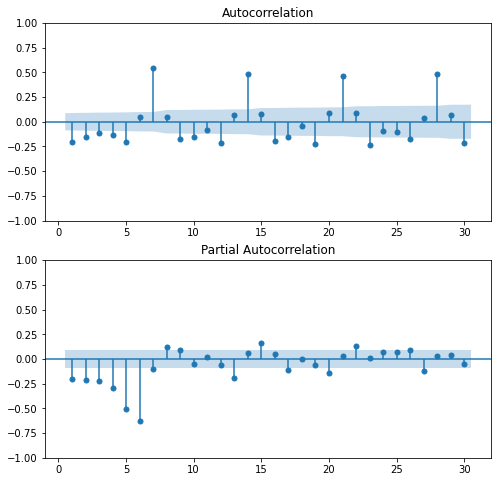

In [47]:
fig, (ax1, ax2)=plt.subplots(2,1,figsize=(8,8))

plot_acf(df_bresil_dt['y'].diff().dropna(),lags=30, zero=False, ax=ax1)
plot_pacf(df_bresil_dt['y'].diff().dropna(),lags=30, zero=False, ax=ax2)
plt.show()

> Heuresement pour nous, il existe une commande auto_arima de la bibliotheque *pmdarima* qui cherche les meilleurs valeurs des paramètres SARIMA en comparant la mesure de qualité AIC (Akaike information criterion): il propose une estimation de la perte d'information lorsqu'on utilise le modèle considéré pour représenter le processus qui génère les données. On choisit alors le modèle avec le critère d'information d'Akaike le plus faible.

In [48]:
pm.auto_arima(df_bresil_dt['y'], start_p=0, d=None, start_q=0, max_p=3, max_q=3,
                      seasonal=True, m=7, D=None, test='adf', start_P=0, start_Q=0, max_P=3, max_Q=3,
                      information_criterion='aic', trace=True, error_action='ignore',
                      trend=None,with_intercept=False, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=11381.376, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7]             : AIC=11136.410, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=11063.066, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=11256.185, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=10811.840, Time=1.46 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=10919.935, Time=0.95 sec
 ARIMA(0,1,1)(2,0,1)[7]             : AIC=inf, Time=2.29 sec
 ARIMA(0,1,1)(1,0,2)[7]             : AIC=11023.102, Time=0.99 sec
 ARIMA(0,1,1)(0,0,2)[7]             : AIC=11099.312, Time=0.45 sec
 ARIMA(0,1,1)(2,0,0)[7]             : AIC=10878.850, Time=1.76 sec
 ARIMA(0,1,1)(2,0,2)[7]             : AIC=inf, Time=3.96 sec
 ARIMA(0,1,0)(1,0,1)[7]             : AIC=11094.287, Time=0.66 sec
 ARIMA(1,1,1)(1,0,1)[7]             : AIC=11006.552, Time=0.48 sec
 ARIMA(0,1,2)(1,0,1)[7]             : AIC=10819.314, Time=1.66 sec
 ARIMA(1,1,0)(1,0,1)[7]        

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

> On va donc entrainé le model SARIMA avec les parametres (0,1,1)(1,0,1)[7]

In [49]:
model_s = SARIMAX(df_bresil_dt['y'], order=(0,1,1), seasonal_order=(1,0,1,7))
model_s_fit = model_s.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09105D+01    |proj g|=  1.36617D-01

At iterate    5    f=  1.08063D+01    |proj g|=  1.35743D-02


/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.



At iterate   10    f=  1.07987D+01    |proj g|=  1.54652D-03

At iterate   15    f=  1.07986D+01    |proj g|=  6.19544D-05

At iterate   20    f=  1.07985D+01    |proj g|=  1.30972D-03

At iterate   25    f=  1.07959D+01    |proj g|=  6.42000D-03

At iterate   30    f=  1.06325D+01    |proj g|=  2.89248D-02

At iterate   35    f=  1.06225D+01    |proj g|=  4.96932D-04

At iterate   40    f=  1.06067D+01    |proj g|=  1.37459D-02
  ys=-3.738E-02  -gs= 5.187E-03 BFGS update SKIPPED

At iterate   45    f=  1.05944D+01    |proj g|=  7.46757D-03

At iterate   50    f=  1.05920D+01    |proj g|=  1.57705D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



> On a ici un résumé de notre modèle ainsi que les graphe des résidus et de leur densité. On retrouve une une densité des résidus qui forment une loi Normale et un graphe quantile-quantile correct.

In [50]:
model_s_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  510
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -5401.920
Date:                           Tue, 01 Feb 2022   AIC                          10811.840
Time:                                   18:59:13   BIC                          10828.770
Sample:                               01-23-2020   HQIC                         10818.478
                                    - 06-15-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8443      0.015    -56.831      0.000      -0.873      -0.815
ar.S.L7        0.9866      0.009    108.009      0.000       0.969       1.005
ma.S.L7       -0.7732      0.031    -24.802      0.000      -0.834      -0.712
sigma2      9.466e+07   1.55e-11   6.11e+18      0.000    9.47e+07    9.47e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               839.69
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):              10.88   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

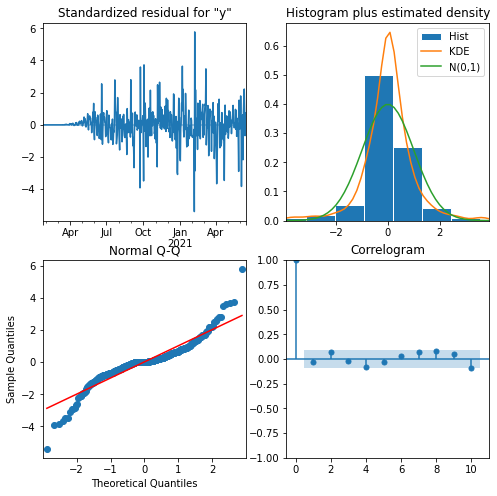

In [51]:
model_s_fit.plot_diagnostics(figsize=(8,8))
plt.show()

> Notre objectif est maintenant de créer une nouvelle base de données avec les prédictions de test du modèle sur les 3 dernières semaines de données et les valeurs de prévision sur les 7 prochains jours.
Nous commençons par créer le jeu de données de la prédiction.

In [52]:
prediction = model_s_fit.get_prediction(start=-prediction_w)
mean_prediction = prediction.predicted_mean

sarimax_prediction = pd.DataFrame({'yhat':mean_prediction})


> Création de la base de donnée de la prédiction.

In [53]:
forecast = model_s_fit.get_forecast(steps=forecast_w)
mean_forecast=forecast.predicted_mean

sarimax_forecast = pd.DataFrame({'yhat':mean_forecast})
sarimax_results = sarimax_prediction.append(sarimax_forecast)

> Visualisation de la prévision du nombre de cas par jour avec le modèle SARIMA au Brésil.

In [54]:
fig = go.Figure()

# Courbe du nombre de cas quotidiens sur les 3 dernieres semaines (jeu d'entrainemnt) 
fig.add_trace(go.Scatter(x=df_bresil_dt[-prediction_w:].index, y=df_bresil_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour Brésil'))

# Courbe de la prédiction SARIMA.
fig.add_trace(go.Scatter(x=sarimax_results.index, y=sarimax_results.yhat,
                         mode='lines+markers',
                         name='Cas/jour Brésil SARIMAX'))

# Courbe du nombre de cas quotidien lors des 7 jours prédit au Brésil
fig.add_trace(go.Scatter(x=df_covid_bra['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_bra['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour Brésil '))

fig.update_layout(
    title_text="Nouveaux cas en Brésil avec SARIMAX.")

fig.show()

> Nous allons pour finir avec le modèle SARIMA, calculer des mesures de qualités/précisions du modèle pour juger nos prévisions. 
>
> La métrique MAPE est à 19,13 % ce implique que le modèle est précis à environ 80,87 % pour prédire les 7 prochaines observations. Le coefficient de detremination est de 0,53, notre modèle n'est pas très bon mais reste correct. Les erreurs absolue et quadratique moyenne sont entre 10 900 et 14 400, on pourra par la suite les comparer avec les 2 autres modèles. 

In [55]:
mape_sarimax= MAPE(df_bresil_dt[-prediction_w:]['y'], mean_prediction.values)
r2_sarimax= r2_score(df_bresil_dt[-prediction_w:]['y'],mean_prediction.values)
rmse_sarimax = mean_squared_error(df_bresil_dt[-prediction_w:]['y'], mean_prediction.values, squared=False)
mae_sarimax = mean_absolute_error(df_bresil_dt[-prediction_w:]['y'],mean_prediction.values)

print('SARIMAX MAPE: ', mape_sarimax.round(2))
print('SARIMAX MAE: ', mae_sarimax.round(2))
print('SARIMAX R2: ', r2_sarimax.round(2))
print('SARIMAX RMSE: ', rmse_sarimax.round(2))


SARIMAX MAPE:  19.13
SARIMAX MAE:  10927.43
SARIMAX R2:  0.53
SARIMAX RMSE:  14404.52


#### Prédiction avec Prophet (Brésil)

> À présent nous allons faire la même prédiction mais avec un modèle different, Prophet.  On instancie dans un premier temps le modèle, on ajoute une saisonalité d'une période de 7 jours puis on entraine le model. Il y a plusieurs hyperparametres à changer lorsqu'on instancie le modèle, n_changepoints correspond à la précision des prédiction (par défaut 25), le modèle est un modèle additif et nous rajoutons une saisonnalité hebdomadaire et annuel.

In [56]:
model_p = Prophet(n_changepoints=50,
                 seasonality_mode='additive',
                 changepoint_prior_scale=1)

In [57]:
model_p.add_seasonality('weekly', period = 7, fourier_order = 8)
model_p.add_seasonality('yearly', period = 365, fourier_order = 19)


> Nous entrainons notre modèle

In [58]:
model_p_fit = model_p.fit(df_bresil)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -10.2695
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       899.375     0.0131362       57.0782           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       901.464    0.00145224        32.749      0.7864      0.7864      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       901.629   0.000341868       21.2771   4.398e-05       0.001      300  LS failed, Hessian reset 
     299       901.895    0.00250362       61.1272       0.429           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        902.47    0.00150978       16.0852      0.8487      0.8487      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       902.655   0.000758029    

> Pour effectuer la prédiction, nous devons d'abord créer une base de données des prédictions des 7 prochians jours puis nous effectuons celles ci. 

In [59]:
future = model_p.make_future_dataframe(periods=forecast_w)

In [60]:
forecast = model_p.predict(future)


> On affiche ainsi les prédictions du modèle puis la tendance et saisonalité de celles ci. On note une tendance à la hausse les dernieres jours et des données plus basses le dimanche et lundi. Cela est dû à la reception des données.

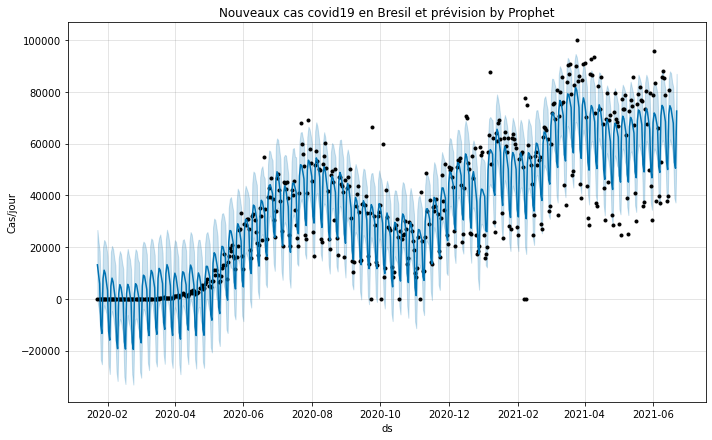

In [61]:
model_p.plot(forecast);
plt.title("Nouveaux cas covid19 en Bresil et prévision by Prophet")
plt.ylabel("Cas/jour")
plt.show()

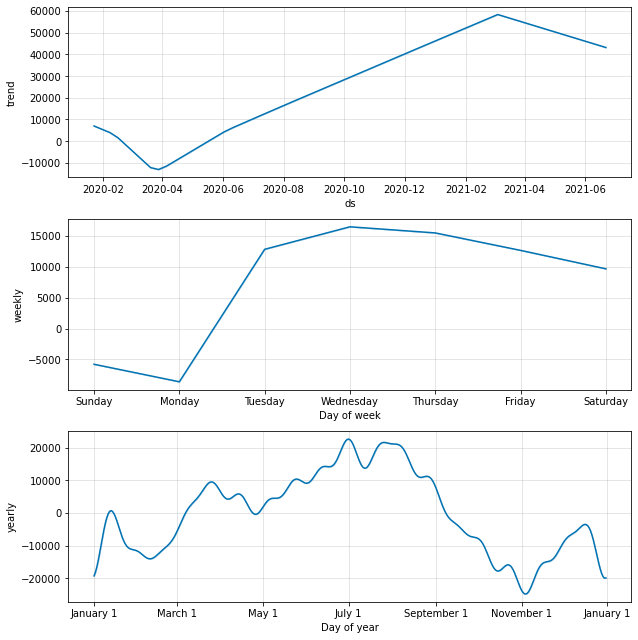

In [62]:
fig = model_p.plot_components(forecast)

> On crée notre dataframe avec les valeurs prédites (yhat) puis nous affichons les courbes du nombre de cas par jour 
au Brésil ces dernieres semaines et la prédiction à l'aide du modèle Prophet. On voit que le modèle attenue légeremnt les hausses et baisses de cas.

In [63]:
f_df = forecast[['ds', 'yhat']]
f_df.tail()

ds          yhat
512 2021-06-18  70713.367281
513 2021-06-19  67880.406434
514 2021-06-20  52776.542223
515 2021-06-21  50455.261169
516 2021-06-22  72562.581233

In [64]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_bresil_dt[-prediction_w:].index, y=df_bresil_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour Brésil'))

fig.add_trace(go.Scatter(x=f_df[-window:]['ds'], y=f_df[-window:]['yhat'],
                         mode='lines+markers',
                         name='Cas/jour Brésil Prophet'))


fig.add_trace(go.Scatter(x=df_covid_bra['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_bra['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour Brésil '))

fig.update_layout(
    title_text="Nouveaux cas en Brésil avec Prophet.")

fig.show()

> Lorsqu'on regarde les mesures de qualité du modèle, on voit qu'elles sont proches que celle du modèle SARIMA, on a presque le meme R2 (0,52), un coefficinet MAPE legerement plus mauvais, ce qui induit un MAE plus elevé. 

In [65]:
mape_p= MAPE(df_covid_bra['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'].values)
r2_p= r2_score(df_covid_bra['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'].values)
rmse_p = mean_squared_error(df_covid_bra['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'].values, squared=False)
mae_p = mean_absolute_error(df_covid_bra['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'].values)

print('PROPHET RMSE: ', rmse_p.round(2))
print('PROPHET MAPE: ', mape_p.round(2))
print('PROPHET R2: ', r2_p.round(2))
print('PROPHET MAE: ', mae_p.round(2))

PROPHET RMSE:  14877.99
PROPHET MAPE:  22.77
PROPHET R2:  0.53
PROPHET MAE:  13172.23


#### Prédiction avec Holt Winters (Brésil)

> Pour finir, nous allons faire une derniere prédiction avec la méthode de lissage exponentielle Holt-Winters. On instancie les parametres de la fonction en ajoutant une saisonalité de 7 jours sur un modèle additif puis nous entrainons le modèle. On affiche un résumé de l'entrainement du model Holt Winters.

In [66]:
model_hw = ExponentialSmoothing(df_bresil_dt['y'][-prediction_w:], seasonal_periods=7, trend='add', seasonal='add')
model_hw_fit = model_hw.fit()



/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [67]:
print(model_hw_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                     2958062379.471
Optimized:                         True   AIC                            416.029
Trend:                         Additive   BIC                            427.519
Seasonal:                      Additive   AICC                           468.029
Seasonal Periods:                     7   Date:                 Tue, 01 Feb 2022
Box-Cox:                          False   Time:                         18:59:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1817857                alpha                 True
smoothing_trend          

> On effectue les predictions du modèle HW, puis on crée le dataframe correspondant. On trace ensuite le graphe du nombre de cas quotidien au Bresil et ces prédictions avec le modèle de lissage exponentielles.

In [68]:
model_hw_pred = model_hw_fit.forecast((7))

In [69]:

model_hw_pred = pd.DataFrame(model_hw_pred)
model_hw_pred.rename(columns={0:'yhat'}, inplace=True)

In [70]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_bresil_dt[-prediction_w:].index, y=df_bresil_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour Brésil'))

fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                         mode='lines+markers',
                         name='Cas/jour Brésil HW'))


fig.add_trace(go.Scatter(x=df_covid_bra['cases_per_day']['2021-06-16':'2021-06-23'].index,
                         y=df_covid_bra['cases_per_day']['2021-06-16':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour Brésil '))

fig.update_layout(
    title_text="Nouveaux cas en Brésil avec HW.")

fig.show()


> Au niveau des métriques, ce modèle est légèrement meilleurs que les deux autres au niveau du R2 (0,55) mais ne gagne pas sur l'erreur absolue moyenne en % à 17,58%. La fenetre entre le MAE et le RMSE est entre 11 000 et 15 000.

In [71]:
mape_hw= MAPE(df_covid_bra['2021-06-16':'2021-06-22']['cases_per_day'], model_hw_pred.yhat)
r2_hw= r2_score(df_covid_bra['2021-06-16':'2021-06-22']['cases_per_day'],model_hw_pred.yhat)
rmse_hw = mean_squared_error(df_covid_bra['2021-06-16':'2021-06-22']['cases_per_day'], model_hw_pred.yhat, squared=False)
mae_hw = mean_absolute_error(df_covid_bra['2021-06-16':'2021-06-22']['cases_per_day'],model_hw_pred.yhat)

print('HW RMSE: ', rmse_hw.round(2))
print('HW MAPE ', mape_hw.round(2))
print('HW R2: ', r2_hw.round(2))
print('HW MAE: ', mae_hw.round(2))

HW RMSE:  14861.77
HW MAPE  17.58
HW R2:  0.55
HW MAE:  11878.5


#### Bilan Brésil

> Pour ce qui est de la prédiction du Brésil, on constate qu'il n'y a pas de grande différence de performance entre les différents modèles. 

In [72]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_bresil_dt[-prediction_w:].index, y=df_bresil_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour Bresil'))

fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                         mode='lines+markers',
                         name='Cas/jour Bresil HW'))

fig.add_trace(go.Scatter(x=sarimax_results[-7:].index, y=sarimax_results[-7:].yhat,
                         mode='lines+markers',
                         name='Cas/jour Bresil SARIMAX'))

fig.add_trace(go.Scatter(x=f_df[-window:]['ds'][-7:], y=f_df[-window:]['yhat'][-7:],
                         mode='lines+markers',
                         name='Cas/jour Bresil Prophet'))


fig.add_trace(go.Scatter(x=df_covid_bra['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_bra['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour Brésil '))

fig.update_layout(
    title_text="Nouveaux cas au Bresil avec HW/PROPHET/SARIMA.")

fig.show()

In [73]:
d = [ ["SARIMA", mape_sarimax, mae_sarimax, r2_sarimax.round(2), rmse_sarimax],
     ["PROPHET", mape_p, mae_p, r2_p.round(2), rmse_p],
     ["HOLT-WINTERS", mape_hw, mae_hw, r2_hw.round(2), rmse_hw]]

print(tabulate(d, headers=["Modèle", "MAPE", "MAE", "R2", "RMSE"]))

Modèle           MAPE      MAE    R2     RMSE
------------  -------  -------  ----  -------
SARIMA        19.1328  10927.4  0.53  14404.5
PROPHET       22.7702  13172.2  0.53  14878
HOLT-WINTERS  17.582   11878.5  0.55  14861.8


### Prédiction du nombre de cas quotidiens en France

> Nous allons faire à l'aide de nos trois modèles la prédiction sur les 7 prochains jours du nombre de cas quotidien en France. Nous n'allons pas détailler autant que précedement chaque étapes car nous reprenons les même codes. Nous alllons comparer les métriques notament le coefficient de determination et le MAPE pour voir si selon les differents pays et évolution du nombres de cas par jour un modèle de prédiction peut être plus ou moins performant.    

In [74]:
#Création du datframe
df_france = df_model(df_covid_fr).dropna()
df_france_dt = df_france.set_index('ds')


#### Prédiction avec SARIMA (France)

In [75]:
results=pm.auto_arima(df_france_dt['y'], start_p=0, d=None, start_q=0, max_p=2, max_q=2,
                      seasonal=True, m=7, D=None, test='adf', start_P=0, start_Q=0, max_P=3, max_Q=3,
                      information_criterion='aic', trace=True, error_action='ignore',
                      trend=None,with_intercept=False, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=11241.795, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7]             : AIC=11062.338, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=10877.338, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=10921.681, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=10870.260, Time=0.34 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=10869.172, Time=0.15 sec
 ARIMA(0,1,1)(2,0,0)[7]             : AIC=10870.413, Time=0.37 sec
 ARIMA(0,1,1)(2,0,1)[7]             : AIC=10866.564, Time=1.21 sec
 ARIMA(0,1,1)(3,0,1)[7]             : AIC=10868.420, Time=1.96 sec
 ARIMA(0,1,1)(2,0,2)[7]             : AIC=10868.455, Time=1.72 sec
 ARIMA(0,1,1)(1,0,2)[7]             : AIC=10867.225, Time=1.00 sec
 ARIMA(0,1,1)(3,0,0)[7]             : AIC=10872.155, Time=0.65 sec
 ARIMA(0,1,1)(3,0,2)[7]             : AIC=10870.550, Time=2.16 sec
 ARIMA(0,1,0)(2,0,1)[7]             : AIC=11193.174, Time=0.81 sec
 ARIMA(1,1,1)(2,0,1

In [76]:
model_s = SARIMAX(df_france_dt['y'], order=(2,1,2), seasonal_order=(2,0,1,7))
model_s_fit = model_s.fit()

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06397D+01    |proj g|=  9.48693D-02

At iterate    5    f=  1.06272D+01    |proj g|=  1.10392D-02

At iterate   10    f=  1.06152D+01    |proj g|=  2.16119D-02

At iterate   15    f=  1.06135D+01    |proj g|=  6.08639D-03

At iterate   20    f=  1.06045D+01    |proj g|=  2.60263D-02

At iterate   25    f=  1.06024D+01    |proj g|=  5.35329D-03

At iterate   30    f=  1.06020D+01    |proj g|=  2.72569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [77]:
model_s_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  510
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -5407.045
Date:                             Tue, 01 Feb 2022   AIC                          10830.090
Time:                                     19:00:32   BIC                          10863.949
Sample:                                 01-23-2020   HQIC                         10843.366
                                      - 06-15-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0735      0.075     -0.981      0.327      -0.220       0.073
ar.L2         -0.2624      0.039     -6.749      0.000      -0.339      -0.186
ma.L1         -0.9449      0.082    -11.493      0.000      -1.106      -0.784
ma.L2          0.2104      0.069      3.070      0.002       0.076       0.345
ar.S.L7        1.1295      0.099     11.400      0.000       0.935       1.324
ar.S.L14      -0.1620      0.053     -3.084      0.002      -0.265      -0.059
ma.S.L7       -0.8897      0.093     -9.536      0.000      -1.073      -0.707
sigma2      1.168e+08   8.34e-10    1.4e+17      0.000    1.17e+08    1.17e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4872.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               6.59   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.77e+33. Standard errors may be unstable.
"""

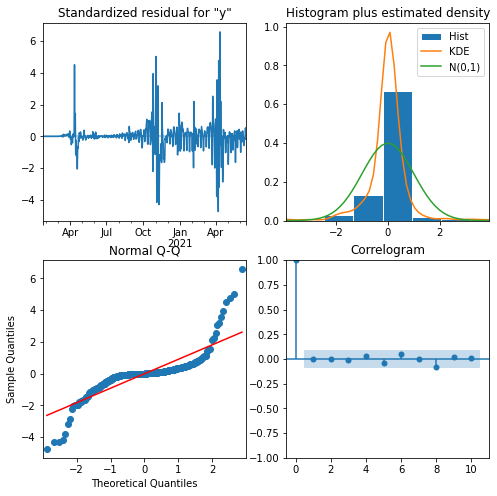

In [78]:
model_s_fit.plot_diagnostics(figsize=(8,8))
plt.show()

In [79]:
prediction = model_s_fit.get_prediction(start=-prediction_w)
mean_prediction = prediction.predicted_mean
sarimax_prediction = pd.DataFrame({'yhat':mean_prediction})

In [80]:
forecast = model_s_fit.get_forecast(steps=forecast_w)
mean_forecast=forecast.predicted_mean

sarimax_forecast = pd.DataFrame({'yhat':mean_forecast})
sarimax_results = sarimax_prediction.append(sarimax_forecast)

In [81]:
#On enlève les prédictions inférieur à 0 (iln epeut pas y avoir moins de cas que 0)
sarimax_results.loc[sarimax_results['yhat']<0] = 0


In [82]:
# Visualisation de la prévision du nombre de cas par jour avec le modèle SARIMA en France.
fig = go.Figure()

# Courbe du nombre de cas quotidiens sur les 3 dernieres semaines (jeu d'entrainemnt) 
fig.add_trace(go.Scatter(x=df_france_dt[-prediction_w:].index, y=df_france_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour France'))

# Courbe de la prédiction SARIMA.
fig.add_trace(go.Scatter(x=sarimax_results.index, y=sarimax_results.yhat,
                         mode='lines+markers',
                         name='Cas/jour France SARIMAX'))

# Courbe du nombre de cas quotidien lors des 7 jours prédit au France
fig.add_trace(go.Scatter(x=df_covid_fr['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_fr['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour France '))

fig.update_layout(
    title_text="Nouveaux cas en France avec SARIMAX.")

> On constate que pour la France le MAPE n'est pas correct. 

In [83]:
mape_sarimax= MAPE(df_france_dt[-prediction_w:]['y'], mean_prediction.values)
r2_sarimax= r2_score(df_france_dt[-prediction_w:]['y'],mean_prediction.values)
rmse_sarimax = mean_squared_error(df_france_dt[-prediction_w:]['y'], mean_prediction.values, squared=False)
mae_sarimax = mean_absolute_error(df_france_dt[-prediction_w:]['y'],mean_prediction.values)

print('SARIMAX MAPE: ', mape_sarimax.round(2))
print('SARIMAX MAE: ', mae_sarimax.round(2))
print('SARIMAX R2: ', r2_sarimax.round(2))
print('SARIMAX RMSE: ', rmse_sarimax.round(2))

SARIMAX MAPE:  134.69
SARIMAX MAE:  2887.34
SARIMAX R2:  0.27
SARIMAX RMSE:  3789.59


#### Prédiction avec Prophet (France)

In [84]:
model_p = Prophet(n_changepoints=50,
                 seasonality_mode='additive',
                 changepoint_prior_scale=1)
model_p.add_seasonality('weekly', period = 7, fourier_order = 8)
model_p.add_seasonality('yearly', period = 365, fourier_order = 19)
model_p_fit = model_p.fit(df_france)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.44207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1032.13   0.000373027       14.1384           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1032.63    0.00117337       11.4726      0.4739      0.4739      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       1032.76   5.34171e-05       12.1382   2.476e-06       0.001      346  LS failed, Hessian reset 
     299       1032.88   0.000447313       11.9634           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1033.04   0.000400956       4.44804      0.9843      0.9843      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     404       1033.05   5.71198e-05    

In [85]:
future = model_p.make_future_dataframe(periods=forecast_w)
forecast = model_p.predict(future)

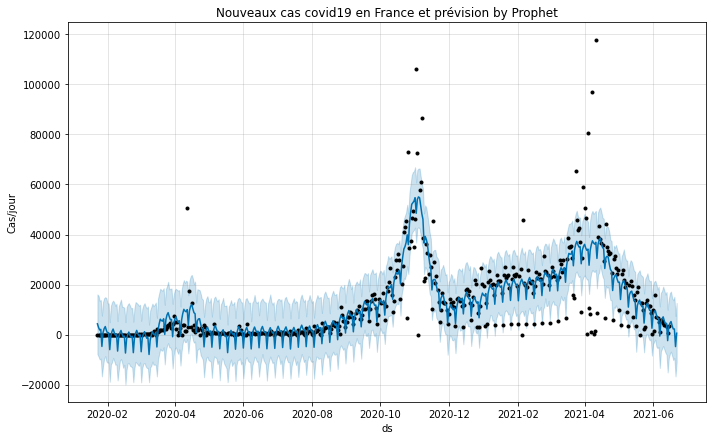

In [86]:
model_p.plot(forecast);
plt.title("Nouveaux cas covid19 en France et prévision by Prophet")
plt.ylabel("Cas/jour")
plt.show()

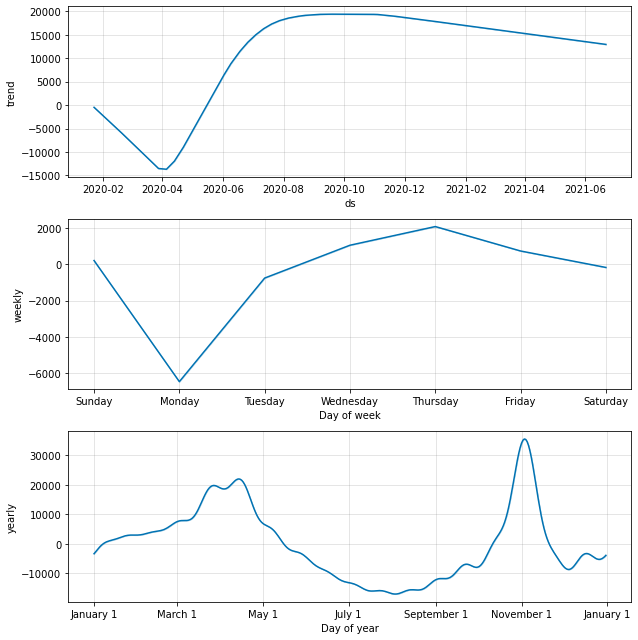

In [87]:
fig = model_p.plot_components(forecast)

In [88]:
f_df = forecast[['ds', 'yhat']]
f_df['yhat'].loc[f_df['yhat']<0] =0


In [89]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_france_dt[-prediction_w:].index, y=df_france_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour France'))

fig.add_trace(go.Scatter(x=f_df[-window:]['ds'], y=f_df[-window:]['yhat'],
                         mode='lines+markers',
                         name='Cas/jour France Prophet'))


fig.add_trace(go.Scatter(x=df_covid_fr['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_fr['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour France '))

fig.update_layout(
    title_text="Nouveaux cas en France avec Prophet.")

fig.show()


In [90]:
mape_p= MAPE(df_covid_fr['2021-05-26':'2021-06-22']['cases_per_day'], f_df[-window:]['yhat'])
r2_p= r2_score(df_covid_fr['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'])
rmse_p = mean_squared_error(df_covid_fr['2021-05-26':'2021-06-22']['cases_per_day'], f_df[-window:]['yhat'], squared=False)
mae_p = mean_absolute_error(df_covid_fr['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'])

print('PROPHET RMSE: ', rmse_p.round(2))
print('PROPHET MAPE: ', mape_p.round(2))
print('PROPHET R2: ', r2_p.round(2))
print('PROPHET MAE: ', mae_p.round(2))


PROPHET RMSE:  2292.4
PROPHET MAPE:  76.16
PROPHET R2:  0.71
PROPHET MAE:  1581.74


#### Prédiction avec Holt Winters (France)


In [91]:
model_hw = ExponentialSmoothing(df_france_dt['y'][-prediction_w:], seasonal_periods=7, trend='add', seasonal='add')

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [92]:

model_hw_fit = model_hw.fit()
print(model_hw_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                      131787595.964
Optimized:                         True   AIC                            350.696
Trend:                         Additive   BIC                            362.186
Seasonal:                      Additive   AICC                           402.696
Seasonal Periods:                     7   Date:                 Tue, 01 Feb 2022
Box-Cox:                          False   Time:                         19:00:39
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0757143                alpha                 True
smoothing_trend          

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [93]:
model_hw_pred = model_hw_fit.forecast((7))
model_hw_pred = pd.DataFrame(model_hw_pred)
model_hw_pred.rename(columns={0:'yhat'}, inplace=True)

model_hw_pred['yhat'].loc[model_hw_pred['yhat']<0]=0


In [94]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_france_dt[-prediction_w:].index, y=df_france_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour France'))

fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                         mode='lines+markers',
                         name='Cas/jour France HW'))


fig.add_trace(go.Scatter(x=df_covid_fr['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_fr['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour France '))

fig.update_layout(
    title_text="Nouveaux cas en France avec HW.")

fig.show()



In [95]:
mape_hw= MAPE(df_covid_fr['2021-06-16':'2021-06-22']['cases_per_day'], model_hw_pred.yhat)
r2_hw= r2_score(df_covid_fr['2021-06-16':'2021-06-22']['cases_per_day'],model_hw_pred.yhat)
rmse_hw = mean_squared_error(df_covid_fr['2021-06-16':'2021-06-22']['cases_per_day'], model_hw_pred.yhat, squared=False)
mae_hw = mean_absolute_error(df_covid_fr['2021-06-16':'2021-06-22']['cases_per_day'],model_hw_pred.yhat)

print('HW RMSE: ', rmse_hw.round(2))
print('HW MAPE ', mape_hw.round(2))
print('HW R2: ', r2_hw.round(2))
print('HW MAE: ', mae_hw.round(2))

HW RMSE:  2240.21
HW MAPE  81.36
HW R2:  -6.09
HW MAE:  1673.86


#### Bilan France

> Lorsqu'on effectue les prédictions de la France on remarque des errurs dans les métriques. On retrouve beaucoup de valeur extreme ou d'écart entre deux jours de données (entre le 30 mai et le 4 juin on a des valeurs qui ne suivent pas une tendaces précise). On ne retrouve pas une saisonnalité marquée comme on peut le voir sur les jeux de données du Brésil et du Japon notamment. On a donc une prédiction moins performante, voir mauvaise. La solution peut etre de prendre le nombre de cas quotidiens lissé sur 7 jours (à l'aide de la moyenne mobile) pour voir si l'on a une meilleur performance. 
>
> EDIT : On obtient de meilleurs resultats après le lissage sur 7jours pour la France seulement, on peut voir le code en après la prédiction du Japon.

In [96]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_france_dt[-prediction_w:].index, y=df_france_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour France'))

fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                         mode='lines+markers',
                         name='Cas/jour France HW'))

fig.add_trace(go.Scatter(x=sarimax_results[-7:].index, y=sarimax_results[-7:].yhat,
                         mode='lines+markers',
                         name='Cas/jour France SARIMAX'))

fig.add_trace(go.Scatter(x=f_df[-window:]['ds'][-7:], y=f_df[-window:]['yhat'][-7:],
                         mode='lines+markers',
                         name='Cas/jour France Prophet'))


fig.add_trace(go.Scatter(x=df_covid_fr['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_fr['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour France '))

fig.update_layout(
    title_text="Nouveaux cas au France avec HW/PROPHET/SARIMA.")

fig.show()


In [97]:
d = [ ["SARIMA", mape_sarimax, mae_sarimax, r2_sarimax, rmse_sarimax],
     ["PROPHET", mape_p, mae_p, r2_p, rmse_p],
     ["HOLT-WINTERS", mape_hw, mae_hw, r2_hw, rmse_hw]]

print(tabulate(d, headers=["Modèle", "MAPE", "MAE", "R2", "RMSE"]))

Modèle            MAPE      MAE         R2     RMSE
------------  --------  -------  ---------  -------
SARIMA        134.688   2887.34   0.267356  3789.59
PROPHET        76.1648  1581.74   0.712155  2292.4
HOLT-WINTERS   81.3556  1673.86  -6.09382   2240.21


### Prédiction du nombre de cas quotidien au Japon

> Pour finir, on regarde la prédiction des cas confirmés quotidiens de la Covid-19 au Japon.

In [98]:
#Création du datframe

df_japon = df_model(df_covid_jap).dropna()

df_japon_dt = df_japon.set_index('ds')


#### Prédiction avec SARIMA (Japon)

In [99]:
results=pm.auto_arima(df_japon_dt['y'], start_p=0, d=None, start_q=0, max_p=3, max_q=3,
                      seasonal=True, m=7, D=None, test='adf', start_P=0, start_Q=0, max_P=3, max_Q=3,
                      information_criterion='aic', trace=True, error_action='ignore',
                      trend=None,with_intercept=False, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7827.616, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7]             : AIC=7645.544, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=7693.118, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=7820.557, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[7]             : AIC=7631.455, Time=0.44 sec
 ARIMA(1,1,0)(3,0,0)[7]             : AIC=7596.865, Time=0.87 sec
 ARIMA(1,1,0)(3,0,1)[7]             : AIC=7571.856, Time=5.24 sec
 ARIMA(1,1,0)(2,0,1)[7]             : AIC=7572.619, Time=2.17 sec
 ARIMA(1,1,0)(3,0,2)[7]             : AIC=7572.588, Time=4.62 sec
 ARIMA(1,1,0)(2,0,2)[7]             : AIC=7570.731, Time=1.88 sec
 ARIMA(1,1,0)(1,0,2)[7]             : AIC=7570.107, Time=2.14 sec
 ARIMA(1,1,0)(0,0,2)[7]             : AIC=7680.802, Time=0.49 sec
 ARIMA(1,1,0)(1,0,1)[7]             : AIC=7583.533, Time=0.99 sec
 ARIMA(1,1,0)(1,0,3)[7]             : AIC=7570.742, Time=5.36 sec
 ARIMA(1,1,0)(0,0,1)[7]          

In [100]:
model_s = SARIMAX(df_japon_dt['y'], order=(1,1,0), seasonal_order=(1,0,2,7))
model_s_fit = model_s.fit()
model_s_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52432D+00    |proj g|=  1.58267D-01


/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.



At iterate    5    f=  7.48502D+00    |proj g|=  3.21574D-02

At iterate   10    f=  7.47077D+00    |proj g|=  9.62017D-03

At iterate   15    f=  7.46901D+00    |proj g|=  7.71336D-04

At iterate   20    f=  7.46855D+00    |proj g|=  5.82620D-03

At iterate   25    f=  7.43551D+00    |proj g|=  2.89673D-02

At iterate   30    f=  7.43255D+00    |proj g|=  6.11160D-04

At iterate   35    f=  7.42162D+00    |proj g|=  9.30681D-02
  ys=-1.148E-02  -gs= 4.867E-03 BFGS update SKIPPED

At iterate   40    f=  7.41259D+00    |proj g|=  3.11932D-02

At iterate   45    f=  7.41187D+00    |proj g|=  7.46130D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  510
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 7)   Log Likelihood               -3780.053
Date:                                Tue, 01 Feb 2022   AIC                           7570.107
Time:                                        19:01:25   BIC                           7591.269
Sample:                                    01-23-2020   HQIC                          7578.404
                                         - 06-15-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2815      0.016    -17.980      0.000      -0.312      -0.251
ar.S.L7        0.9891      0.013     73.405      0.000       0.963       1.015
ma.S.L7       -0.6653      0.031    -21.339      0.000      -0.726      -0.604
ma.S.L14      -0.1885      0.026     -7.323      0.000      -0.239      -0.138
sigma2      1.623e+05   4506.678     36.012      0.000    1.53e+05    1.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7872.54
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             198.85   Skew:                             1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

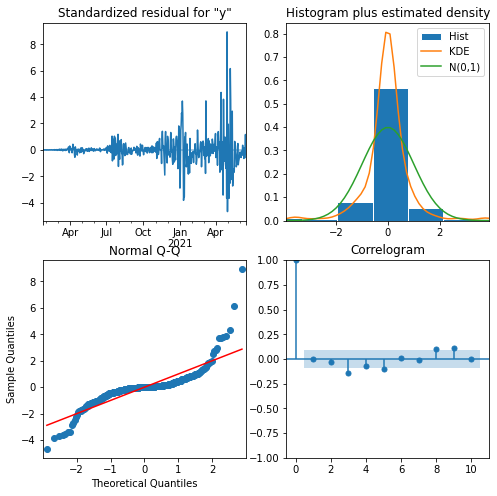

In [101]:
model_s_fit.plot_diagnostics(figsize=(8,8))
plt.show()

In [102]:
prediction = model_s_fit.get_prediction(start=-prediction_w)
mean_prediction = prediction.predicted_mean
sarimax_prediction = pd.DataFrame({'yhat':mean_prediction})

In [103]:
forecast = model_s_fit.get_forecast(steps=forecast_w)
mean_forecast=forecast.predicted_mean

sarimax_forecast = pd.DataFrame({'yhat':mean_forecast})
sarimax_results = sarimax_prediction.append(sarimax_forecast)

In [104]:
sarimax_results.loc[sarimax_results['yhat']<0] = 0


In [105]:
# Visualisation de la prévision du nombre de cas par jour avec le modèle SARIMA en Japon.
fig = go.Figure()

# Courbe du nombre de cas quotidiens sur les 3 dernieres semaines (jeu d'entrainemnt) 
fig.add_trace(go.Scatter(x=df_japon_dt[-prediction_w:].index, y=df_japon_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour Japon'))

# Courbe de la prédiction SARIMA.
fig.add_trace(go.Scatter(x=sarimax_results.index, y=sarimax_results.yhat,
                         mode='lines+markers',
                         name='Cas/jour Japon SARIMAX'))

# Courbe du nombre de cas quotidien lors des 7 jours prédit au Japon
fig.add_trace(go.Scatter(x=df_covid_jap['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_jap['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour Japon '))

fig.update_layout(
    title_text="Nouveaux cas en Japon avec SARIMAX.")
fig.show()

In [106]:
mape_sarimax= MAPE(df_japon_dt[-prediction_w:]['y'], mean_prediction.values)
r2_sarimax= r2_score(df_japon_dt[-prediction_w:]['y'],mean_prediction.values)
rmse_sarimax = mean_squared_error(df_japon_dt[-prediction_w:]['y'], mean_prediction.values, squared=False)
mae_sarimax = mean_absolute_error(df_japon_dt[-prediction_w:]['y'],mean_prediction.values)

print('SARIMAX MAPE: ', mape_sarimax.round(2))
print('SARIMAX MAE: ', mae_sarimax.round(2))
print('SARIMAX R2: ', r2_sarimax.round(2))
print('SARIMAX RMSE: ', rmse_sarimax.round(2))

SARIMAX MAPE:  8.72
SARIMAX MAE:  179.51
SARIMAX R2:  0.95
SARIMAX RMSE:  218.55


#### Prédiction avec Prophet (Japon)

In [107]:
model_p = Prophet(n_changepoints=50,
                 seasonality_mode='additive',
                 changepoint_prior_scale=1)
model_p.add_seasonality('weekly', period = 7, fourier_order = 8)
model_p.add_seasonality('yearly', period = 365, fourier_order = 19)
model_p_fit = model_p.fit(df_japon)



INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -14.0962
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1198.89    0.00603573       842.853      0.8418      0.8418      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1204.36    0.00291076       27.7932           1           1      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1208.68    0.00160251       68.5084      0.9041      0.9041      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1216.08    0.00177457       35.5659           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1224.86     0.0281993       45.4642           1           1      545   
    Iter      log prob        ||dx||      ||grad||       alpha  

  3399       1239.54    0.00418316       21.3164           1           1     4286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3499       1239.58    0.00411789       37.3624      0.5167           1     4412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3530       1239.64   3.14805e-05       17.9555   1.723e-06       0.001     4485  LS failed, Hessian reset 
    3599        1239.7   0.000150998       8.73399      0.9436      0.9436     4564   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3699       1239.75   0.000208801       8.80224           1           1     4678   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3799       1239.79   0.000210261       21.8658      0.7908      0.7908     4795   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Not

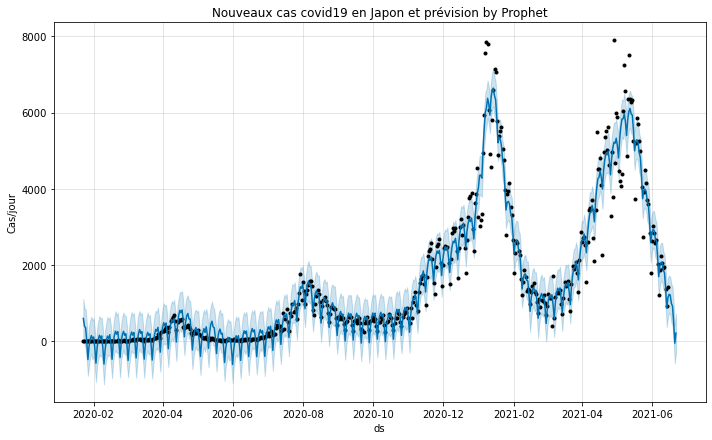

In [108]:
future = model_p.make_future_dataframe(periods=forecast_w)
forecast = model_p.predict(future)

model_p.plot(forecast);
plt.title("Nouveaux cas covid19 en Japon et prévision by Prophet")
plt.ylabel("Cas/jour")
plt.show()

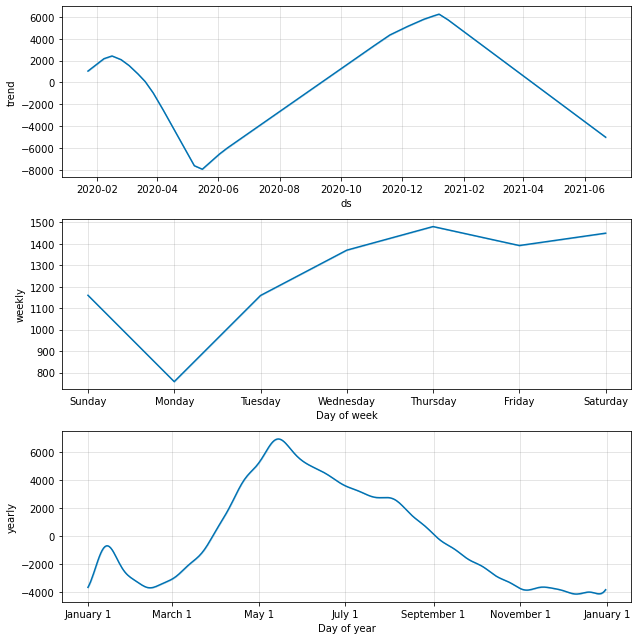

In [109]:
fig = model_p.plot_components(forecast)
f_df = forecast[['ds', 'yhat']]
f_df['yhat'].loc[f_df['yhat']<0] =0


In [110]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_japon_dt[-prediction_w:].index, y=df_japon_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour Japon'))

fig.add_trace(go.Scatter(x=f_df[-window:]['ds'], y=f_df[-
                                                        window:]['yhat'],
                         mode='lines+markers',
                         name='Cas/jour Japon Prophet'))


fig.add_trace(go.Scatter(x=df_covid_jap['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_jap['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour Japon '))

fig.update_layout(
    title_text="Nouveaux cas en Japon avec Prophet.")

fig.show()

In [111]:
mape_p= MAPE(df_covid_jap['2021-05-26':'2021-06-22']['cases_per_day'], f_df[-window:]['yhat'])
r2_p= r2_score(df_covid_jap['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'])
rmse_p = mean_squared_error(df_covid_jap['2021-05-26':'2021-06-22']['cases_per_day'], f_df[-window:]['yhat'], squared=False)
mae_p = mean_absolute_error(df_covid_jap['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'])

print('PROPHET RMSE: ', rmse_p.round(2))
print('PROPHET MAPE: ', mape_p.round(2))
print('PROPHET R2: ', r2_p.round(2))
print('PROPHET MAE: ', mae_p.round(2))

PROPHET RMSE:  444.28
PROPHET MAPE:  20.33
PROPHET R2:  0.77
PROPHET MAE:  317.09


#### Prédiction avec Holt Winters (Japon)

In [112]:
model_hw = ExponentialSmoothing(df_japon_dt['y'][-prediction_w:], seasonal_periods=7, trend='add', seasonal='add')
model_hw_fit = model_hw.fit()
print(model_hw_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                         355185.396
Optimized:                         True   AIC                            226.453
Trend:                         Additive   BIC                            237.943
Seasonal:                      Additive   AICC                           278.453
Seasonal Periods:                     7   Date:                 Tue, 01 Feb 2022
Box-Cox:                          False   Time:                         19:01:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7007845                alpha                 True
smoothing_trend          

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [113]:
model_hw_pred = model_hw_fit.forecast((7))
model_hw_pred = pd.DataFrame(model_hw_pred)
model_hw_pred.rename(columns={0:'yhat'}, inplace=True)

In [114]:
model_hw_pred['yhat'].loc[model_hw_pred['yhat']<0]=0


In [115]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_japon_dt[-prediction_w:].index, y=df_japon_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour Japon'))

fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                         mode='lines+markers',
                         name='Cas/jour Japon HW'))


fig.add_trace(go.Scatter(x=df_covid_jap['cases_per_day']['2021-06-16':'2021-06-23'].index,
                         y=df_covid_jap['cases_per_day']['2021-06-16':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour Japon '))

fig.update_layout(
    title_text="Nouveaux cas en Japon avec HW.")

fig.show()

In [116]:
mape_hw= MAPE(df_covid_jap['2021-06-16':'2021-06-22']['cases_per_day'], model_hw_pred.yhat)
r2_hw= r2_score(df_covid_jap['2021-06-16':'2021-06-22']['cases_per_day'],model_hw_pred.yhat)
rmse_hw = mean_squared_error(df_covid_jap['2021-06-16':'2021-06-22']['cases_per_day'], model_hw_pred.yhat, squared=False)
mae_hw = mean_absolute_error(df_covid_jap['2021-06-16':'2021-06-22']['cases_per_day'],model_hw_pred.yhat)

print('HW RMSE: ', rmse_hw.round(2))
print('HW MAPE ', mape_hw.round(2))
print('HW R2: ', r2_hw.round(2))
print('HW MAE: ', mae_hw.round(2))

HW RMSE:  257.64
HW MAPE  18.19
HW R2:  0.03
HW MAE:  229.44


#### Bilan Japon

> Au japon, les trois modèles fonctionnent très bien, notamment SARIMA avec un coefficient de determination de plus de 0,9 et une prédiction des 7 pchains jours précis à plus de 90%. Les données sont très marquées sur la semaine et le nombre de cas pas trop élevés ce qui explique la bonne performance des prédictions.

In [117]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_japon_dt[-prediction_w:].index, y=df_japon_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour Japon'))

fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                         mode='lines+markers',
                         name='Cas/jour Japon HW'))

fig.add_trace(go.Scatter(x=sarimax_results[-7:].index, y=sarimax_results[-7:].yhat,
                         mode='lines+markers',
                         name='Cas/jour Japon SARIMAX'))

fig.add_trace(go.Scatter(x=f_df[-window:]['ds'][-7:], y=f_df[-window:]['yhat'][-7:],
                         mode='lines+markers',
                         name='Cas/jour Japon Prophet'))


fig.add_trace(go.Scatter(x=df_covid_jap['cases_per_day']['2021-06-15':'2021-06-23'].index,
                         y=df_covid_jap['cases_per_day']['2021-06-15':'2021-06-23'],
                         mode='lines+markers',
                         name='Cas/jour Japon '))

fig.update_layout(
    title_text="Nouveaux cas au Japon avec HW/PROPHET/SARIMA.")

fig.show()


In [118]:
d = [ ["SARIMA", mape_sarimax, mae_sarimax, r2_sarimax, rmse_sarimax],
     ["PROPHET", mape_p, mae_p, r2_p, rmse_p],
     ["HOLT-WINTERS", mape_hw, mae_hw, r2_hw, rmse_hw]]

print(tabulate(d, headers=["Modèle", "MAPE", "MAE", "R2", "RMSE"]))

Modèle            MAPE      MAE         R2     RMSE
------------  --------  -------  ---------  -------
SARIMA         8.72284  179.508  0.945558   218.546
PROPHET       20.329    317.091  0.772583   444.284
HOLT-WINTERS  18.1851   229.439  0.0258655  257.636


### EDIT : Prédiction France avec les données lissées sur 7 jours

> Nous allons voir avant de conclure que nos modèles de prédictions pour certains pays peuvent être plus performant avec des données lissées sur 7 jours. C'est le cas pour la France à cause comme on l'a dit précedemment des données pas assez saisonniées avec des trop grandes differences d'un jour à l'aure, des valeurs abérantes possiblemment. Le principe reste le même, on change le dataframe de départ en prenant la moyenne mobile des cas par jour. 

In [119]:
#La fonction df_model() permet de creer un dataframe contenant seulement la variable date et le nombre de cas par jour.
def df_model_roll(df):
    df = pd.DataFrame(df['cases_per_day']['2020-01-22':'2021-06-15'].rolling(window = 7, center = True).mean().round())
    df = df.reset_index()
    df = df.rename(columns={"date":"ds","cases_per_day":"y"})
    return df

In [120]:
#Création du datframe
df_france = df_model_roll(df_covid_fr).dropna()
df_france_dt = df_france.set_index('ds')



#### Prédiction avec SARIMA (France données lissées)

In [121]:
model_s = SARIMAX(df_france_dt['y'], order=(1,1,1), seasonal_order=(2,0,1,7))
model_s_fit = model_s.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.82747D+00    |proj g|=  8.59816D-02


/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.



At iterate    5    f=  8.81795D+00    |proj g|=  5.63293D-02

At iterate   10    f=  8.80163D+00    |proj g|=  2.14139D-02

At iterate   15    f=  8.76152D+00    |proj g|=  4.43039D-02

At iterate   20    f=  8.74242D+00    |proj g|=  9.84983D-03

At iterate   25    f=  8.74108D+00    |proj g|=  3.52289D-03

At iterate   30    f=  8.73837D+00    |proj g|=  3.29524D-02

At iterate   35    f=  8.73533D+00    |proj g|=  5.07608D-03

At iterate   40    f=  8.73385D+00    |proj g|=  2.03952D-03

At iterate   45    f=  8.73383D+00    |proj g|=  7.38463D-04

At iterate   50    f=  8.73364D+00    |proj g|=  7.58677D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [122]:
prediction = model_s_fit.get_prediction(start=-prediction_w)
mean_prediction = prediction.predicted_mean
sarimax_prediction = pd.DataFrame({'yhat':mean_prediction})

In [123]:
forecast = model_s_fit.get_forecast(steps=forecast_w)
mean_forecast=forecast.predicted_mean

sarimax_forecast = pd.DataFrame({'yhat':mean_forecast})
sarimax_results = sarimax_prediction.append(sarimax_forecast)

In [124]:
# Visualisation de la prévision du nombre de cas par jour avec le modèle SARIMA en France.
fig = go.Figure()

# Courbe du nombre de cas quotidiens sur les 3 dernieres semaines (jeu d'entrainemnt) 
fig.add_trace(go.Scatter(x=df_france_dt[-prediction_w:].index, y=df_france_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour France'))

# Courbe de la prédiction SARIMA.
fig.add_trace(go.Scatter(x=sarimax_results.index, y=sarimax_results.yhat,
                         mode='lines+markers',
                         name='Cas/jour France SARIMAX'))

# Courbe du nombre de cas quotidien lors des 7 jours prédit au France
fig.add_trace(go.Scatter(x=df_covid_fr['cases_per_day']['2021-06-8':'2021-06-23'].index,
                         y=df_covid_fr['cases_per_day']['2021-06-8':'2021-06-23'].rolling(window = 7, center = True).mean().round(),
                         mode='lines+markers',
                         name='Cas/jour France '))

fig.update_layout(
    title_text="Nouveaux cas en France avec SARIMAX.")

In [125]:
mape_sarimax= MAPE(df_france_dt[-prediction_w:]['y'], mean_prediction.values)
r2_sarimax= r2_score(df_france_dt[-prediction_w:]['y'],mean_prediction.values)
rmse_sarimax = mean_squared_error(df_france_dt[-prediction_w:]['y'], mean_prediction.values, squared=False)
mae_sarimax = mean_absolute_error(df_france_dt[-prediction_w:]['y'],mean_prediction.values)

print('SARIMAX MAPE: ', mape_sarimax.round(2))
print('SARIMAX MAE: ', mae_sarimax.round(2))
print('SARIMAX R2: ', r2_sarimax.round(2))
print('SARIMAX RMSE: ', rmse_sarimax.round(2))

SARIMAX MAPE:  9.46
SARIMAX MAE:  578.55
SARIMAX R2:  0.87
SARIMAX RMSE:  717.82


#### Prédiction avec Prophet (France données lissées)

In [126]:
model_p = Prophet(n_changepoints=50,
                 seasonality_mode='additive',
                 changepoint_prior_scale=1)
model_p.add_seasonality('weekly', period = 7, fourier_order = 8)
model_p.add_seasonality('yearly', period = 365, fourier_order = 19)
model_p_fit = model_p.fit(df_france)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.1637
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1513.13   0.000597398        167.23      0.8782      0.8782      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1538.28     0.0021381       393.193      0.3914      0.3914      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1549.73     0.0114124       289.684           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1552.71    0.00378682       184.465           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1556.43   0.000966892       141.762           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [127]:
future = model_p.make_future_dataframe(periods=forecast_w)
forecast = model_p.predict(future)

ls  Notes 
    2599       1566.17    2.0874e-05       8.87621           1           1     3147   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       1566.22   3.35804e-05       19.7612      0.8741      0.8741     3258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       1566.33    0.00154779       41.4107           1           1     3377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899       1567.08      0.010503       199.904           1           1     3484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       1567.34    0.00285527       183.721      0.2673           1     3601   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3099       1567.53   0.000638088       23.4963           1           1     3719   
    Ite

In [128]:
f_df = forecast[['ds', 'yhat']]

In [129]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_france_dt[-prediction_w:].index, y=df_france_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour France'))

fig.add_trace(go.Scatter(x=f_df[-window:]['ds'], y=f_df[-window:]['yhat'],
                         mode='lines+markers',
                         name='Cas/jour France Prophet'))


fig.add_trace(go.Scatter(x=df_covid_fr['cases_per_day']['2021-06-8':'2021-06-23'].index,
                         y=df_covid_fr['cases_per_day']['2021-06-8':'2021-06-23'].rolling(window = 7, center = True).mean().round(),
                         mode='lines+markers',
                         name='Cas/jour France '))

fig.update_layout(
    title_text="Nouveaux cas en France avec Prophet.")

fig.show()


In [130]:
r = df_covid_fr['cases_per_day']['2021-05-20':'2021-06-23'].rolling(window = 7, center = True).mean().round().dropna()

mape_p= MAPE(r, f_df[-window:]['yhat'])
r2_p= r2_score(r,f_df[-window:]['yhat'])
rmse_p = mean_squared_error(r, f_df[-window:]['yhat'], squared=False)
mae_p = mean_absolute_error(r,f_df[-window:]['yhat'])

print('PROPHET RMSE: ', rmse_p.round(2))
print('PROPHET MAPE: ', mape_p.round(2))
print('PROPHET R2: ', r2_p.round(2))
print('PROPHET MAE: ', mae_p.round(2))

PROPHET RMSE:  606.38
PROPHET MAPE:  8.03
PROPHET R2:  0.94
PROPHET MAE:  370.29


#### Prédiction avec Holt Winters (France données lissées)


In [131]:

model_hw = ExponentialSmoothing(df_france_dt['y'][-prediction_w:], seasonal_periods=7, trend='add', seasonal='add')
model_hw_fit = model_hw.fit()

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [132]:
model_hw_pred = model_hw_fit.forecast((7))
model_hw_pred = pd.DataFrame(model_hw_pred)
model_hw_pred.rename(columns={0:'yhat'}, inplace=True)

In [133]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_france_dt[-prediction_w:].index, y=df_france_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour France'))

fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                         mode='lines+markers',
                         name='Cas/jour France HW'))


fig.add_trace(go.Scatter(x=df_covid_fr['cases_per_day']['2021-06-8':'2021-06-23'].index,
                         y=df_covid_fr['cases_per_day']['2021-06-8':'2021-06-23'].rolling(window = 7, center = True).mean().round(),
                         mode='lines+markers',
                         name='Cas/jour France '))

fig.update_layout(
    title_text="Nouveaux cas en France avec HW.")

fig.show()



In [134]:
r = df_covid_fr['cases_per_day']['2021-06-10':'2021-06-23'].rolling(window = 7, center = True).mean().round().dropna()

mape_hw= MAPE(r, model_hw_pred.yhat)
r2_hw= r2_score(r,model_hw_pred.yhat)
rmse_hw = mean_squared_error(r, model_hw_pred.yhat, squared=False)
mae_hw = mean_absolute_error(r,model_hw_pred.yhat)

print('HW RMSE: ', rmse_hw.round(2))
print('HW MAPE ', mape_hw.round(2))
print('HW R2: ', r2_hw.round(2))
print('HW MAE: ', mae_hw.round(2))

HW RMSE:  370.64
HW MAPE  13.25
HW R2:  -0.5
HW MAE:  326.4


#### Bilan  France (données lissées)

> On voit à l'aide des métriques la nette amélioration des perfomance de nos modèles, même si la prédiction SARIMA n'est pas vraiment ce ue nous attendions comme on peu le voir ce le graphique.

In [135]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_france_dt[-prediction_w:].index, y=df_france_dt[-prediction_w:]['y'],
                         mode='lines+markers',
                         name='Cas/jour France'))

fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                         mode='lines+markers',
                         name='Cas/jour France HW'))

fig.add_trace(go.Scatter(x=sarimax_results[-7:].index, y=sarimax_results[-7:].yhat,
                         mode='lines+markers',
                         name='Cas/jour France SARIMAX'))

fig.add_trace(go.Scatter(x=f_df[-window:]['ds'][-7:], y=f_df[-window:]['yhat'][-7:],
                         mode='lines+markers',
                         name='Cas/jour France Prophet'))


fig.add_trace(go.Scatter(x=df_covid_fr['cases_per_day']['2021-06-8':'2021-06-23'].index,
                         y=df_covid_fr['cases_per_day']['2021-06-8':'2021-06-23'].rolling(window = 7, center = True).mean().round(),
                         mode='lines+markers',
                         name='Cas/jour France '))

fig.update_layout(
    title_text="Nouveaux cas au France avec HW/PROPHET/SARIMA.")

fig.show()


In [136]:
d = [ ["SARIMA", mape_sarimax, mae_sarimax, r2_sarimax, rmse_sarimax],
     ["PROPHET", mape_p, mae_p, r2_p, rmse_p],
     ["HOLT-WINTERS", mape_hw, mae_hw, r2_hw, rmse_hw]]

print(tabulate(d, headers=["Modèle", "MAPE", "MAE", "R2", "RMSE"]))

Modèle            MAPE      MAE         R2     RMSE
------------  --------  -------  ---------  -------
SARIMA         9.46333  578.55    0.870827  717.817
PROPHET        8.03256  370.29    0.944068  606.381
HOLT-WINTERS  13.2541   326.396  -0.495286  370.639


## Fonction de prédion pour chaque modèle

> Pour chaque modèle de prédiction, nous avons crée une fonction qui comprend en parametre le dataframe original du pays, un boléen *rolling* si l'on veut lissée nos données sur 7 jours et pour le modèle SARIMA, les hyperparametres à remplir. Dans le notebook, nous n'utilisons pas ces fonctions pour une question d'esthetisme et de facilité de compréhension, mais voici les fonctions et un exemple avec nos pays choisie.  

### SARIMA

In [137]:
def SARIMA(df_covid, p, d, q, a_1, a_2, a_3, rolling):
    
    if rolling == False:
        
        df = pd.DataFrame(df_covid['cases_per_day']['2020-01-22':'2021-06-15'])
        df = df.reset_index()
        df = df.rename(columns={"date":"ds","cases_per_day":"y"})

        df_s = df.dropna()
        df_s_dt = df_s.set_index('ds')

        model_s = SARIMAX(df_s_dt['y'], order=(p,d,q), seasonal_order=(a_1,a_2,a_3,7))
        model_s_fit = model_s.fit()

        print(model_s_fit.summary())

        model_s_fit.plot_diagnostics(figsize=(8,8))
        plt.show()

        prediction = model_s_fit.get_prediction(start=-prediction_w)
        mean_prediction = prediction.predicted_mean

        sarimax_prediction = pd.DataFrame({'yhat':mean_prediction})

        forecast = model_s_fit.get_forecast(steps=forecast_w)
        mean_forecast=forecast.predicted_mean

        sarimax_forecast = pd.DataFrame({'yhat':mean_forecast})
        sarimax_results = sarimax_prediction.append(sarimax_forecast)
        
        sarimax_results.loc[sarimax_results['yhat']<0] = 0

        fig = go.Figure()

        # Courbe du nombre de cas quotidiens sur les 3 dernieres semaines (jeu d'entrainemnt) 
        fig.add_trace(go.Scatter(x=df_s_dt[-prediction_w:].index, y=df_s_dt[-prediction_w:]['y'],
                             mode='lines+markers',
                             name='Cas/jour '))

        # Courbe de la prédiction SARIMA.
        fig.add_trace(go.Scatter(x=sarimax_results.index, y=sarimax_results.yhat,
                             mode='lines+markers',
                             name='Cas/jour  SARIMAX'))

        # Courbe du nombre de cas quotidien lors des 7 jours prédit au Brésil
        fig.add_trace(go.Scatter(x=df_covid['cases_per_day']['2021-06-15':'2021-06-23'].index,
                             y=df_covid['cases_per_day']['2021-06-15':'2021-06-23'],
                             mode='lines+markers',
                             name='Cas/jour  '))

        fig.update_layout(
            title_text="Nouveaux cas quotidien avec SARIMAX.")

        fig.show()

        mape_sarimax= MAPE(df_s_dt[-prediction_w:]['y'], mean_prediction.values)
        r2_sarimax= r2_score(df_s_dt[-prediction_w:]['y'],mean_prediction.values)
        rmse_sarimax = mean_squared_error(df_s_dt[-prediction_w:]['y'], mean_prediction.values, squared=False)
        mae_sarimax = mean_absolute_error(df_s_dt[-prediction_w:]['y'],mean_prediction.values)

        print('SARIMAX MAPE: ', mape_sarimax.round(2))
        print('SARIMAX MAE: ', mae_sarimax.round(2))
        print('SARIMAX R2: ', r2_sarimax.round(2))
        print('SARIMAX RMSE: ', rmse_sarimax.round(2))
    
    else:
        
        df = pd.DataFrame(df_covid['cases_per_day']['2020-01-22':'2021-06-15'].rolling(window = 7, center = True).mean().round())
        df = df.reset_index()
        df = df.rename(columns={"date":"ds","cases_per_day":"y"})

        df_s = df.dropna()
        df_s_dt = df_s.set_index('ds')

        model_s = SARIMAX(df_s_dt['y'], order=(p,d,q), seasonal_order=(a_1,a_2,a_3,7))
        model_s_fit = model_s.fit()

        print(model_s_fit.summary())

        model_s_fit.plot_diagnostics(figsize=(8,8))
        plt.show()

        prediction = model_s_fit.get_prediction(start=-prediction_w)
        mean_prediction = prediction.predicted_mean

        sarimax_prediction = pd.DataFrame({'yhat':mean_prediction})

        forecast = model_s_fit.get_forecast(steps=forecast_w)
        mean_forecast=forecast.predicted_mean

        sarimax_forecast = pd.DataFrame({'yhat':mean_forecast})
        sarimax_results = sarimax_prediction.append(sarimax_forecast)
        
        sarimax_results.loc[sarimax_results['yhat']<0] = 0

        # Visualisation de la prévision du nombre de cas par jour avec le modèle SARIMA en France.
        fig = go.Figure()
    
        # Courbe du nombre de cas quotidiens sur les 3 dernieres semaines (jeu d'entrainemnt) 
        fig.add_trace(go.Scatter(x=df_s_dt[-prediction_w:].index, y=df_s_dt[-prediction_w:]['y'],
                                 mode='lines+markers',
                                 name='Cas/jour '))

        # Courbe de la prédiction SARIMA.
        fig.add_trace(go.Scatter(x=sarimax_results.index, y=sarimax_results.yhat,
                                 mode='lines+markers',
                                 name='Cas/jour  SARIMAX'))

        # Courbe du nombre de cas quotidien lors des 7 jours prédit au France
        fig.add_trace(go.Scatter(x=df_covid['cases_per_day']['2021-06-8':'2021-06-23'].index,
                                 y=df_covid['cases_per_day']['2021-06-8':'2021-06-23'].rolling(window = 7, center = True).mean().round(),
                                 mode='lines+markers',
                                 name='Cas/jour  '))

        fig.update_layout(
            title_text="Nouveaux cas en  avec SARIMAX.")
        fig.show()

        mape_sarimax= MAPE(df_s_dt[-prediction_w:]['y'], mean_prediction.values)
        r2_sarimax= r2_score(df_s_dt[-prediction_w:]['y'],mean_prediction.values)
        rmse_sarimax = mean_squared_error(df_s_dt[-prediction_w:]['y'], mean_prediction.values, squared=False)
        mae_sarimax = mean_absolute_error(df_s_dt[-prediction_w:]['y'],mean_prediction.values)

        print('SARIMAX MAPE: ', mape_sarimax.round(2))
        print('SARIMAX MAE: ', mae_sarimax.round(2))
        print('SARIMAX R2: ', r2_sarimax.round(2))
        print('SARIMAX RMSE: ', rmse_sarimax.round(2))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75523D+00    |proj g|=  1.85735D-01


/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

 This problem is unconstrained.



At iterate    5    f=  8.74007D+00    |proj g|=  1.19013D-02

At iterate   10    f=  8.73980D+00    |proj g|=  1.07359D-04

At iterate   15    f=  8.73979D+00    |proj g|=  2.47889D-03

At iterate   20    f=  8.73916D+00    |proj g|=  2.77982D-02

At iterate   25    f=  8.73111D+00    |proj g|=  2.93499D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     33      1     0     0   1.153D-06   8.731D+00
  F =   8.7305031718063635     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                     
Dep. Variable:         

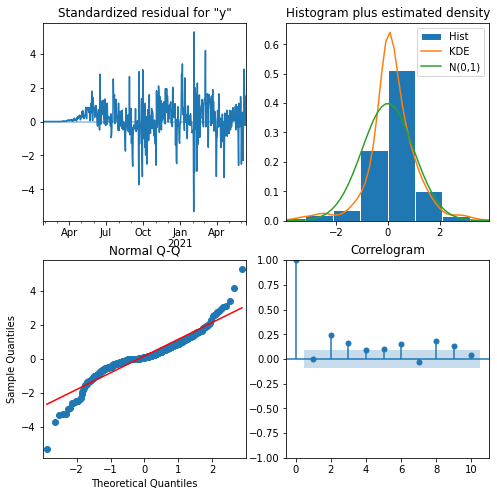

SARIMAX MAPE:  2.44
SARIMAX MAE:  1537.77
SARIMAX R2:  0.61
SARIMAX RMSE:  2038.16


In [138]:
SARIMA(df_covid_bra, 0, 1, 1, 1, 0, 1, True)

### Prophet

In [139]:
def PROPHET(df_covid, rolling):
    
    if rolling == False:
        
        df = pd.DataFrame(df_covid['cases_per_day']['2020-01-22':'2021-06-15'])
        df = df.reset_index()
        df = df.rename(columns={"date":"ds","cases_per_day":"y"})

        df_s = df.dropna()
        df_s_dt = df_s.set_index('ds')

        
        model_p = Prophet(n_changepoints=50,
                         seasonality_mode='additive',
                         changepoint_prior_scale=1)

        model_p.add_seasonality('weekly', period = 7, fourier_order = 8)
        model_p.add_seasonality('yearly', period = 365, fourier_order = 19)


        model_p_fit = model_p.fit(df_s)

        future = model_p.make_future_dataframe(periods=forecast_w)

        forecast = model_p.predict(future)

        
        model_p.plot(forecast);
        plt.title("Nouveaux cas covid19 et prévision by Prophet")
        plt.ylabel("Cas/jour")
        plt.show()

        #model_p.plot_components(forecast)

        f_df = forecast[['ds', 'yhat']]
        
        f_df = forecast[['ds', 'yhat']]
        f_df['yhat'].loc[f_df['yhat']<0] =0
        
        fig = go.Figure()

        fig.add_trace(go.Scatter(x=df_s_dt[-prediction_w:].index, y=df_s_dt[-prediction_w:]['y'],
                                 mode='lines+markers',
                                 name='Cas/jour'))

        fig.add_trace(go.Scatter(x=f_df[-window:]['ds'], y=f_df[-window:]['yhat'],
                                 mode='lines+markers',
                                 name='Cas/jour Prophet'))


        fig.add_trace(go.Scatter(x=df_covid['cases_per_day']['2021-06-15':'2021-06-23'].index,
                                 y=df_covid['cases_per_day']['2021-06-15':'2021-06-23'],
                                 mode='lines+markers',
                                 name='Cas/jour  '))

        fig.update_layout(
            title_text="Nouveaux cas avec Prophet.")

        fig.show()

        mape_p= MAPE(df_covid['2021-05-26':'2021-06-22']['cases_per_day'], f_df[-window:]['yhat'])
        r2_p= r2_score(df_covid['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'])
        rmse_p = mean_squared_error(df_covid['2021-05-26':'2021-06-22']['cases_per_day'], f_df[-window:]['yhat'], squared=False)
        mae_p = mean_absolute_error(df_covid['2021-05-26':'2021-06-22']['cases_per_day'],f_df[-window:]['yhat'])

        print('PROPHET RMSE: ', rmse_p.round(2))
        print('PROPHET MAPE: ', mape_p.round(2))
        print('PROPHET R2: ', r2_p.round(2))
        print('PROPHET MAE: ', mae_p.round(2))
    else:
        
        df = pd.DataFrame(df_covid['cases_per_day']['2020-01-22':'2021-06-15'].rolling(window = 7, center = True).mean().round())
        df = df.reset_index()
        df = df.rename(columns={"date":"ds","cases_per_day":"y"})

        df_s = df.dropna()
        df_s_dt = df_s.set_index('ds')
        
        model_p = Prophet(n_changepoints=50,
                         seasonality_mode='additive',
                         changepoint_prior_scale=1)

        model_p.add_seasonality('weekly', period = 7, fourier_order = 8)
        model_p.add_seasonality('yearly', period = 365, fourier_order = 19)


        model_p_fit = model_p.fit(df_s)

        future = model_p.make_future_dataframe(periods=forecast_w)

        forecast = model_p.predict(future)


        model_p.plot(forecast);
        plt.title("Nouveaux cas covid19 et prévision by Prophet")
        plt.ylabel("Cas/jour")
        plt.show()

        #model_p.plot_components(forecast)

        f_df = forecast[['ds', 'yhat']]
        
        f_df = forecast[['ds', 'yhat']]
        f_df['yhat'].loc[f_df['yhat']<0] =0

        fig = go.Figure()

        fig.add_trace(go.Scatter(x=df_s_dt[-prediction_w:].index, y=df_s_dt[-prediction_w:]['y'],
                                 mode='lines+markers',
                                 name='Cas/jour'))

        fig.add_trace(go.Scatter(x=f_df[-window:]['ds'], y=f_df[-window:]['yhat'],
                                 mode='lines+markers',
                                 name='Cas/jour Prophet'))


        fig.add_trace(go.Scatter(x=df_covid['cases_per_day']['2021-06-8':'2021-06-23'].index,
                                 y=df_covid['cases_per_day']['2021-06-8':'2021-06-23'].rolling(window = 7, center = True).mean().round(),
                                 mode='lines+markers',
                                 name='Cas/jour '))

        fig.update_layout(
            title_text="Nouveaux cas avec Prophet.")

        fig.show()

        r = df_covid['cases_per_day']['2021-05-20':'2021-06-23'].rolling(window = 7, center = True).mean().round().dropna()

        mape_p= MAPE(r, f_df[-window:]['yhat'])
        r2_p= r2_score(r,f_df[-window:]['yhat'])
        rmse_p = mean_squared_error(r, f_df[-window:]['yhat'], squared=False)
        mae_p = mean_absolute_error(r,f_df[-window:]['yhat'])

        print('PROPHET RMSE: ', rmse_p.round(2))
        print('PROPHET MAPE: ', mape_p.round(2))
        print('PROPHET R2: ', r2_p.round(2))
        print('PROPHET MAE: ', mae_p.round(2))

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.94369
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1467.34    0.00117615       225.678           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1502.22    0.00307039        114.62           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1529.86     0.0209388       624.061           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1555.34     0.0595005       991.033      0.4331           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1560.21   0.000965326       161.782           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

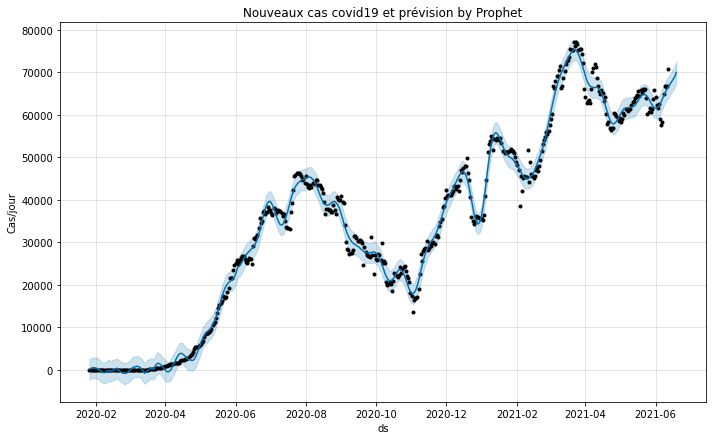

PROPHET RMSE:  3283.57
PROPHET MAPE:  4.19
PROPHET R2:  0.58
PROPHET MAE:  2764.37


In [140]:
PROPHET(df_covid_bra, True)

### Holt-Winters

In [141]:
def HOLT_WINTERS(df_covid, rolling):
    
    if rolling == False:
        df = pd.DataFrame(df_covid['cases_per_day']['2020-01-22':'2021-06-15'])
        df = df.reset_index()
        df = df.rename(columns={"date":"ds","cases_per_day":"y"})

        df_s = df.dropna()
        df_s_dt = df_s.set_index('ds')
        
        model_hw = ExponentialSmoothing(df_s_dt['y'][-prediction_w:], seasonal_periods=7, trend='add', seasonal='add')
        model_hw_fit = model_hw.fit()

        print(model_hw_fit.summary())
        model_hw_pred = model_hw_fit.forecast((7))


        model_hw_pred = pd.DataFrame(model_hw_pred)
        model_hw_pred.rename(columns={0:'yhat'}, inplace=True)


        fig = go.Figure()

        fig.add_trace(go.Scatter(x=df_s_dt[-prediction_w:].index, y=df_s_dt[-prediction_w:]['y'],
                                 mode='lines+markers',
                                 name='Cas/jour'))

        fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                                 mode='lines+markers',
                                 name='Cas/jour HW'))


        fig.add_trace(go.Scatter(x=df_covid['cases_per_day']['2021-06-16':'2021-06-23'].index,
                                 y=df_covid['cases_per_day']['2021-06-16':'2021-06-23'],
                                 mode='lines+markers',
                                 name='Cas/jour'))

        fig.update_layout(
            title_text="Nouveaux cas en Brésil avec HW.")

        fig.show()

        mape_hw= MAPE(df_covid['2021-06-16':'2021-06-22']['cases_per_day'], model_hw_pred.yhat)
        r2_hw= r2_score(df_covid['2021-06-16':'2021-06-22']['cases_per_day'],model_hw_pred.yhat)
        rmse_hw = mean_squared_error(df_covid['2021-06-16':'2021-06-22']['cases_per_day'], model_hw_pred.yhat, squared=False)
        mae_hw = mean_absolute_error(df_covid['2021-06-16':'2021-06-22']['cases_per_day'],model_hw_pred.yhat)

        print('HW RMSE: ', rmse_hw.round(2))
        print('HW MAPE ', mape_hw.round(2))
        print('HW R2: ', r2_hw.round(2))
        print('HW MAE: ', mae_hw.round(2))
    else: 
        df = pd.DataFrame(df_covid['cases_per_day']['2020-01-22':'2021-06-15'].rolling(window = 7, center = True).mean().round())
        df = df.reset_index()
        df = df.rename(columns={"date":"ds","cases_per_day":"y"})

        df_s = df.dropna()
        df_s_dt = df_s.set_index('ds')
        
        model_hw = ExponentialSmoothing(df_s_dt['y'][-prediction_w:], seasonal_periods=7, trend='add', seasonal='add')
        model_hw_fit = model_hw.fit()

        print(model_hw_fit.summary())
        model_hw_pred = model_hw_fit.forecast((7))


        model_hw_pred = pd.DataFrame(model_hw_pred)
        model_hw_pred.rename(columns={0:'yhat'}, inplace=True)
        model_hw_pred['yhat'].loc[model_hw_pred['yhat']<0]=0

        fig = go.Figure()

        fig.add_trace(go.Scatter(x=df_s_dt[-prediction_w:].index, y=df_s_dt[-prediction_w:]['y'],
                                 mode='lines+markers',
                                 name='Cas/jour'))

        fig.add_trace(go.Scatter(x=model_hw_pred.index, y=model_hw_pred.yhat,
                                 mode='lines+markers',
                                 name='Cas/jour HW'))


        fig.add_trace(go.Scatter(x=df_covid['cases_per_day']['2021-06-10':'2021-06-23'].index,
                                 y=df_covid['cases_per_day']['2021-06-10':'2021-06-23'].rolling(window = 7, center = True).mean().round(),
                                 mode='lines+markers',
                                 name='Cas/jour '))

        fig.update_layout(
            title_text="Nouveaux cas avec HW.")

        fig.show()



        r = df_covid['cases_per_day']['2021-06-10':'2021-06-23'].rolling(window = 7, center = True).mean().round().dropna()

        mape_hw= MAPE(r, model_hw_pred.yhat)
        r2_hw= r2_score(r,model_hw_pred.yhat)
        rmse_hw = mean_squared_error(r, model_hw_pred.yhat, squared=False)
        mae_hw = mean_absolute_error(r,model_hw_pred.yhat)

        print('HW RMSE: ', rmse_hw.round(2))
        print('HW MAPE ', mape_hw.round(2))
        print('HW R2: ', r2_hw.round(2))
        print('HW MAE: ', mae_hw.round(2))


In [142]:
HOLT_WINTERS(df_covid_bra, True)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                   21
Model:             ExponentialSmoothing   SSE                      178573231.001
Optimized:                         True   AIC                            357.076
Trend:                         Additive   BIC                            368.565
Seasonal:                      Additive   AICC                           409.076
Seasonal Periods:                     7   Date:                 Tue, 01 Feb 2022
Box-Cox:                          False   Time:                         19:02:00
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9950000                alpha                 True
smoothing_trend          

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/moreltom/opt/anaconda3/envs/prophet39/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



HW RMSE:  1921.1
HW MAPE  2.24
HW R2:  -1.32
HW MAE:  1636.53


> On a testé ici des prédictions pour le Brésil avec des données lissées. Le resultat reste en dessous de ce qu'on peut avoir avec des données non lissées pour nos prédictions.

## Conclusion

> Nous avons vu tout au long de ce projet l'impact de la Covid 19 sur le monde entre les premiers cas début 2020 jusqu'à juin 2021. Chaque pays ne gère pas la crise de la même facon, et certains sont plus ou moins séverement touchés. On a vu que le Brésil à un taux de mortalité bien plus important que la France pour un nombre de cas par million d'habitants presque équivalent. Le Japon quant à lui, s'en sort mieux avec très peu de cas confirmés. 
Pour ce qui est des prédictions, nous avons prédit qu'elle sera le nombre de cas quotidiens dans ces trois pays lors des 7 jours suivants. Le modèle SARIMA et Prophet on des capacités de prédiction assez proche, contrairement à Holt Winter qui varie beaucoup plus. On voit aussi que ces modèles s'adaptent bien pour des données dont la saisonnalité est bien marquée. En effet lorsqu'on prend la cas de la France, les données sont peu homogènes et on retrouve beaucoup de valeurs extrèmes ou des larges écarts entre les valeurs, nos modèles ne sont alors plus performants. On arrive a corriger cette performnce en effectuant les prédictions avec les données lissées sur 7 jours par la moyenne mobile. 
